# Import

In [160]:
# Set up environment
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn')
pd.set_option('display.max_columns', None)
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy.stats as stats
import pickle

%matplotlib inline

In [161]:
# read in data to dataframe
with open('../databases/df-cleaned.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    df = pickle.load(f)

In [162]:
# get some summary info
display(df.head(), df.describe(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 32 columns):
id                      21597 non-null int64
date                    21597 non-null datetime64[ns]
price                   21597 non-null float64
bedrooms                21597 non-null int64
bathrooms               21597 non-null float64
sqft_living             21597 non-null int64
sqft_lot                21597 non-null int64
floors                  21597 non-null float64
condition               21597 non-null int64
grade                   21597 non-null int64
sqft_above              21597 non-null int64
yr_built                21597 non-null int64
zipcode                 21597 non-null int64
lat                     21597 non-null float64
long                    21597 non-null float64
sqft_living15           21597 non-null int64
sqft_lot15              21597 non-null int64
yr_sold                 21597 non-null int64
day_of_yr_sold          21597 non-null int64
month_sold       

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,day_of_yr_sold,month_sold,price_log,sqft_living_log,sqft_above_log,sqft_living15_log,waterfront,view,sqft_basement,yr_renovated,waterfront_binary,view_binary,sqft_basement_binary,yr_renovated_binary
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,2014,286,10,12.309982,7.073270,7.073270,7.200425,0.0,0.0,0.0,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,2014,343,12,13.195614,7.851661,7.682482,7.432484,0.0,0.0,400.0,1991,0,0,1,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,2015,56,2,12.100712,6.646391,6.646391,7.908387,0.0,0.0,0.0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,2014,343,12,13.311329,7.580700,6.956545,7.215240,0.0,0.0,910.0,0,0,0,1,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,2015,49,2,13.142166,7.426549,7.426549,7.495542,0.0,0.0,0.0,0,0,0,0,0


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,day_of_yr_sold,month_sold,price_log,sqft_living_log,sqft_above_log,sqft_living15_log,waterfront,view,sqft_basement,yr_renovated,waterfront_binary,view_binary,sqft_basement_binary,yr_renovated_binary
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.00000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1788.596842,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,2014.322962,184.300042,6.573969,13.048211,7.550720,7.395148,7.539494,0.006760,0.233181,285.716581,68.758207,0.006760,0.097791,0.38510,0.034449
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,827.759761,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950,0.467619,94.737427,3.115061,0.526555,0.424191,0.427140,0.327467,0.081944,0.764673,439.819830,364.037499,0.081944,0.297039,0.48663,0.182384
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,2.000000,1.000000,11.264464,5.913503,5.913503,5.988961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,110.000000,4.000000,12.682307,7.265430,7.081709,7.306531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000,178.000000,6.000000,13.017003,7.554859,7.352441,7.517521,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,262.000000,9.000000,13.377006,7.843849,7.700748,7.766417,0.000000,0.000000,550.000000,0.000000,0.000000,0.000000,1.00000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,365.000000,12.000000,15.856731,9.513404,9.149528,8.733916,1.000000,4.000000,4820.000000,2015.000000,1.000000,1.000000,1.00000,1.000000


None

Let's make it a bit easier to work with by getting rid of some (as yet) unnecessary columns

In [163]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'yr_built',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold',
       'day_of_yr_sold', 'month_sold', 'price_log', 'sqft_living_log',
       'sqft_above_log', 'sqft_living15_log', 'waterfront', 'view',
       'sqft_basement', 'yr_renovated', 'waterfront_binary', 'view_binary',
       'sqft_basement_binary', 'yr_renovated_binary'],
      dtype='object')

In [164]:
# drop the first 2
# df = df.iloc[:, 3:]

# drop non-binary zero-inflated features and non-logged features
# cols = ['price', 'waterfront', 'sqft_living', 'sqft_living15', 'sqft_above', 'view', 'sqft_basement', 'yr_renovated']
# df.drop(columns=cols, inplace=True)

# admire our handywork
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,day_of_yr_sold,month_sold,price_log,sqft_living_log,sqft_above_log,sqft_living15_log,waterfront,view,sqft_basement,yr_renovated,waterfront_binary,view_binary,sqft_basement_binary,yr_renovated_binary
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,2014,286,10,12.309982,7.073270,7.073270,7.200425,0.0,0.0,0.0,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,2014,343,12,13.195614,7.851661,7.682482,7.432484,0.0,0.0,400.0,1991,0,0,1,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,2015,56,2,12.100712,6.646391,6.646391,7.908387,0.0,0.0,0.0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,2014,343,12,13.311329,7.580700,6.956545,7.215240,0.0,0.0,910.0,0,0,0,1,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,2015,49,2,13.142166,7.426549,7.426549,7.495542,0.0,0.0,0.0,0,0,0,0,0


# Check for Linearity
Let's get a view of whether there are linear relationships between any features and price.

In [165]:
# create a dictionary to add models to
models = {}
# create a list to add other results to
results = []

# create list without price
cols = df.columns.to_list()
cols.remove('price_log')
cols.remove('price')

# loop through the columns
for col in cols:
    
    # create a model formula
    f = f'price_log~{col}'
    
    # create model
    model = smf.ols(formula=f, data=df).fit()
    
    # add model to dictionary
    models[col] = model
    
    # add model data to results list
    results.append([col, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
# change results into dataframe
results = pd.DataFrame(results, columns=['ind_var', 'r_squared', 'intercept', 'slope', 'p_value', 'normality_jb'])

# admire our handywork
results

,ind_var,r_squared,intercept,slope,p_value,normality_jb
0,id,0.000014,13.051356,-6.865602e-13,5.814976e-01,1094.557205
1,date,0.022167,13.068616,-5.347640e-02,8.431908e-01,1075.511887
2,bedrooms,0.117896,12.389819,1.951830e-01,0.000000e+00,1471.526272
3,bathrooms,0.303876,12.249565,3.774628e-01,0.000000e+00,196.538139
4,sqft_living,0.483282,12.218777,3.987044e-04,0.000000e+00,3.561514
5,sqft_lot,0.010005,13.029008,1.271798e-06,3.804476e-49,1107.438752
6,floors,0.096491,12.595389,3.030738e-01,0.000000e+00,1031.278553
7,condition,0.001515,12.940799,3.150062e-02,1.057555e-08,1086.242703
8,grade,0.495222,10.629509,3.158434e-01,0.000000e+00,133.707522
9,sqft_above,0.361898,12.363757,3.826768e-04,0.000000e+00,127.656808


In [166]:
# pickle results
with open('../databases/individual_results_df.pickle', 'wb') as f:
    # Pickle the 'results' dataframe using the highest protocol available.
    pickle.dump(results, f, pickle.HIGHEST_PROTOCOL)

# pickle models
with open('../databases/individual_models.pickle', 'wb') as f:
    # Pickle the 'models' dictionary using the highest protocol available.
    pickle.dump(models, f, pickle.HIGHEST_PROTOCOL)

Let's see which features have a linear relationship at significance < .05. We'll say a linear relationship is anything with R^2 greater than 0 (explains variance at least slightly better than the baseline model)

In [167]:
# select for p < 0.05
sig_p = results['p_value'] < .05

# select R^2 > 0
sig_r = results['r_squared'] > 0

# combine them
sig_feats = results[sig_p & sig_r]

# admire our handywork
sig_feats

,ind_var,r_squared,intercept,slope,p_value,normality_jb
2,bedrooms,0.117896,12.389819,0.195183,0.000000e+00,1471.526272
3,bathrooms,0.303876,12.249565,0.377463,0.000000e+00,196.538139
4,sqft_living,0.483282,12.218777,0.000399,0.000000e+00,3.561514
5,sqft_lot,0.010005,13.029008,0.000001,3.804476e-49,1107.438752
6,floors,0.096491,12.595389,0.303074,0.000000e+00,1031.278553
7,condition,0.001515,12.940799,0.031501,1.057555e-08,1086.242703
8,grade,0.495222,10.629509,0.315843,0.000000e+00,133.707522
9,sqft_above,0.361898,12.363757,0.000383,0.000000e+00,127.656808
10,yr_built,0.006494,10.201170,0.001444,1.885764e-32,1134.384919
11,zipcode,0.001504,50.480724,-0.000382,1.183944e-08,1042.732859


It looks like that includes all features. That's okay for now since we still have many other factors to evaluate.

# Check for Normality of Residuals

Let's see if the residuals are normal using quantile-quantile plots for each model.

In [168]:
# create qq_plot function
def get_qq_plot(model, feature):
    """ Get qq plot for model of feature
    """
    print('=============', feature, '=============')
    sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    plt.show()
    

============= bedrooms =============


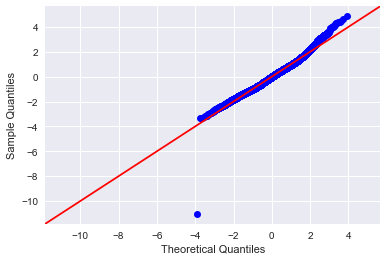

============= bathrooms =============


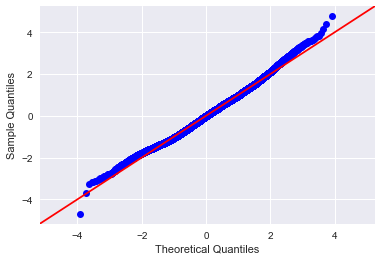

============= sqft_living =============


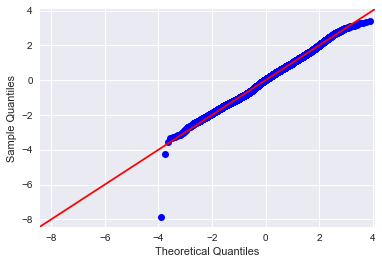

============= sqft_lot =============


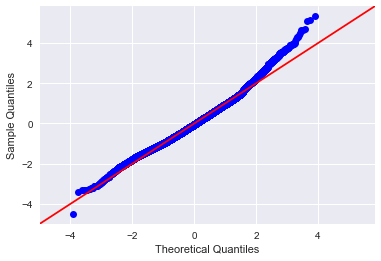

============= floors =============


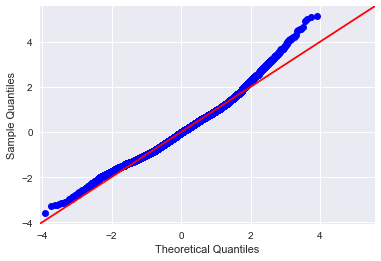

============= condition =============


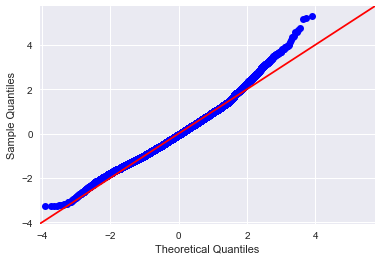

============= grade =============


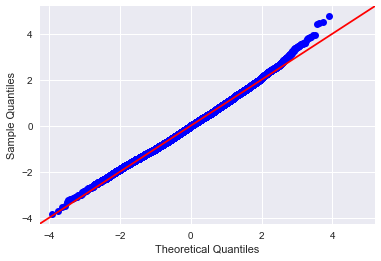

============= sqft_above =============


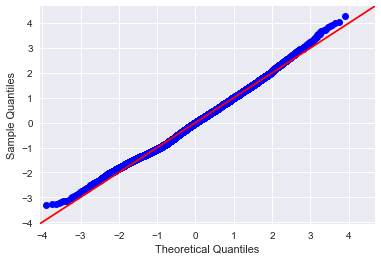

============= yr_built =============


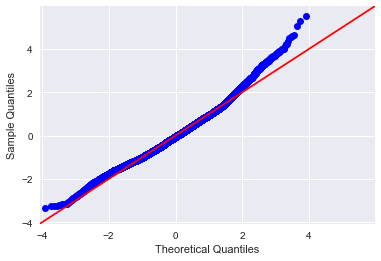

============= zipcode =============


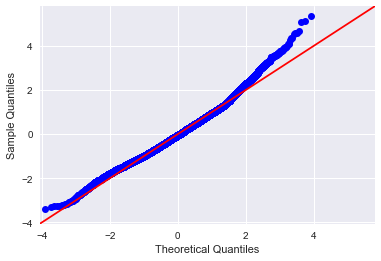

============= lat =============


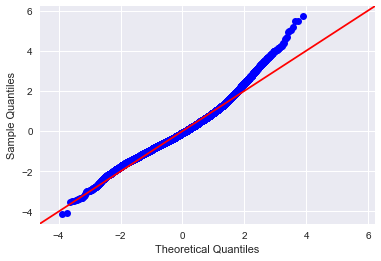

============= long =============


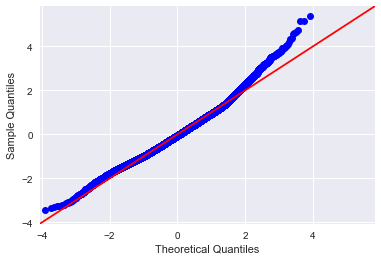

============= sqft_living15 =============


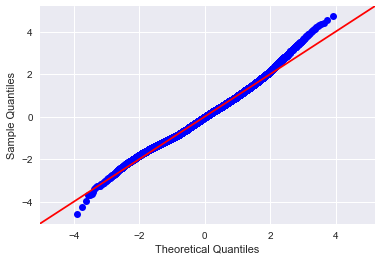

============= sqft_lot15 =============


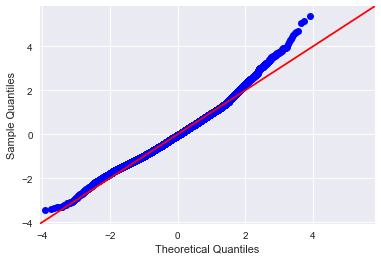

============= day_of_yr_sold =============


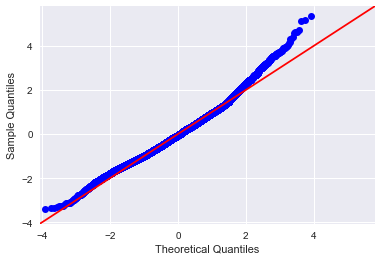

============= sqft_living_log =============


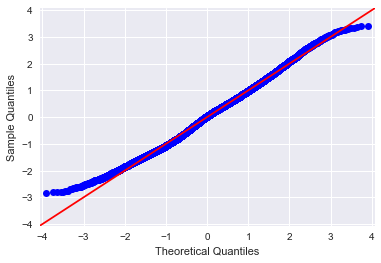

============= sqft_above_log =============


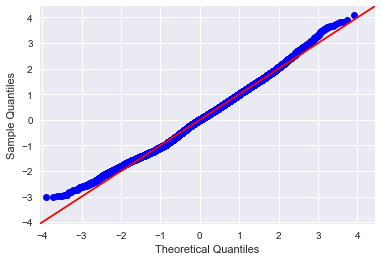

============= sqft_living15_log =============


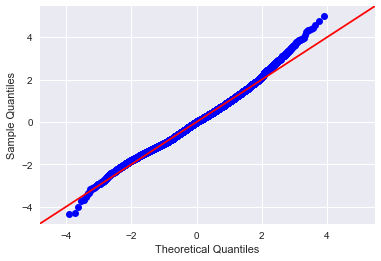

============= waterfront =============


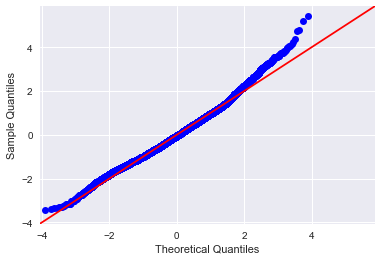

============= view =============


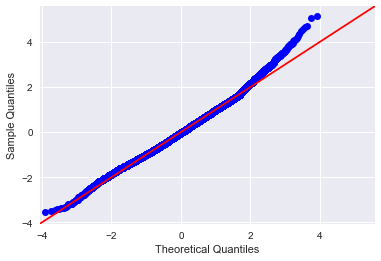

============= sqft_basement =============


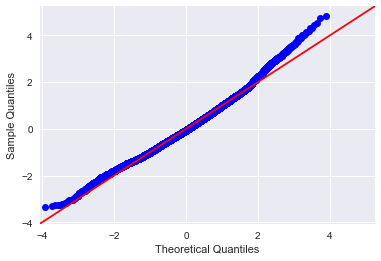

============= yr_renovated =============


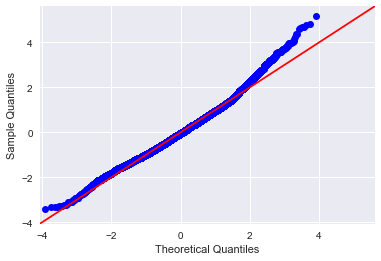

============= waterfront_binary =============


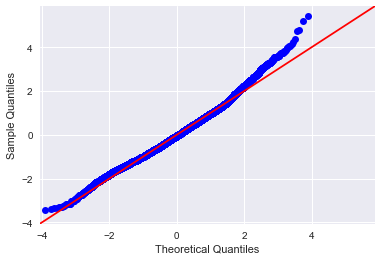

============= view_binary =============


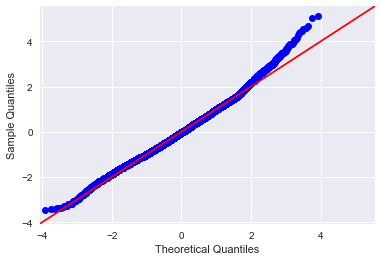

============= sqft_basement_binary =============


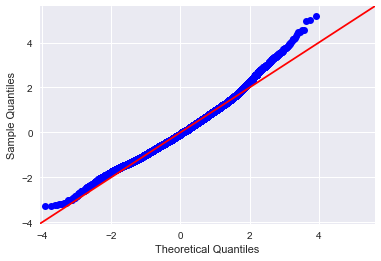

============= yr_renovated_binary =============


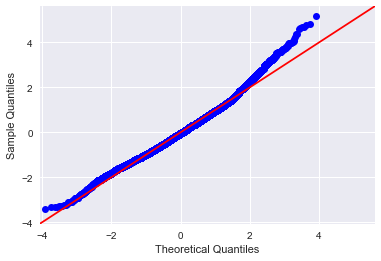

In [169]:
# make a list of the significant features' names
sig_feats_cols = sig_feats['ind_var'].to_list()

# plot all significant features
for feature in sig_feats_cols:
    model = models[feature]
    get_qq_plot(model, feature)

None of the q-q plots look too bad. However, it doesn't look like many Jarque-Bera tests indicate normality.

In [170]:
# select for Jarque-Bera <= 6
jb_sig = sig_feats['normality_jb'] <= 6
sig_feats[jb_sig]

,ind_var,r_squared,intercept,slope,p_value,normality_jb
4,sqft_living,0.483282,12.218777,0.000399,0.0,3.561514


As we can see, the list is almost completely empty. Only `sqft_living` JB is under 6. This means that none of the other features have a normal residual distribution.

In [171]:
for feature in sig_feats_cols:
    print('=============', feature, '=============')
    display(models[feature].summary())

============= bedrooms =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     2886.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:57:18   Log-Likelihood:                -15437.
No. Observations:               21597   AIC:                         3.088e+04
Df Residuals:                   21595   BIC:                         3.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3898      0.013    974.903      0.000      12.365      12.415
bedrooms       0.1952      0.004     53.724      0.000       0.188       0.202
==============================================================================
Omnibus:                      791.447   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1471.526
Skew:                           0.290   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

============= bathrooms =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     9427.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:57:18   Log-Likelihood:                -12880.
No. Observations:               21597   AIC:                         2.576e+04
Df Residuals:                   21595   BIC:                         2.578e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.2496      0.009   1399.614      0.000      12.232      12.267
bathrooms      0.3775      0.004     97.092      0.000       0.370       0.385
==============================================================================
Omnibus:                      191.594   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.538
Skew:                           0.232   Prob(JB):                     2.10e-43
Kurtosis:                       3.063   Cond. No.                         7.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

============= sqft_living =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.020e+04
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:57:18   Log-Likelihood:                -9662.2
No. Observations:               21597   AIC:                         1.933e+04
Df Residuals:                   21595   BIC:                         1.934e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2188      0.006   1915.383      0.000      12.206      12.231
sqft_living     0.0004   2.81e-06    142.118      0.000       0.000       0.000
==============================================================================
Omnibus:                        3.541   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                3.562
Skew:                           0.028   Prob(JB):                        0.169
Kurtosis:                       2.973   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

============= sqft_lot =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     218.2
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           3.80e-49
Time:                        16:57:18   Log-Likelihood:                -16683.
No. Observations:               21597   AIC:                         3.337e+04
Df Residuals:                   21595   BIC:                         3.339e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0290      0.004   3433.471      0.000      13.022      13.036
sqft_lot    1.272e-06   8.61e-08     14.773      0.000     1.1e-06    1.44e-06
==============================================================================
Omnibus:                      855.385   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1107.439
Skew:                           0.425   Prob(JB):                    3.33e-241
Kurtosis:                       3.712   Cond. No.                     4.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

============= floors =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     2306.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:57:18   Log-Likelihood:                -15696.
No. Observations:               21597   AIC:                         3.140e+04
Df Residuals:                   21595   BIC:                         3.141e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5954      0.010   1256.346      0.000      12.576      12.615
floors         0.3031      0.006     48.023      0.000       0.291       0.315
==============================================================================
Omnibus:                      836.437   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1031.279
Skew:                           0.437   Prob(JB):                    1.15e-224
Kurtosis:                       3.618   Cond. No.                         6.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

============= condition =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     32.76
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           1.06e-08
Time:                        16:57:18   Log-Likelihood:                -16776.
No. Observations:               21597   AIC:                         3.356e+04
Df Residuals:                   21595   BIC:                         3.357e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9408      0.019    677.338      0.000      12.903      12.978
condition      0.0315      0.006      5.723      0.000       0.021       0.042
==============================================================================
Omnibus:                      851.356   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1086.243
Skew:                           0.429   Prob(JB):                    1.33e-236
Kurtosis:                       3.686   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

============= grade =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 2.119e+04
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:57:18   Log-Likelihood:                -9409.7
No. Observations:               21597   AIC:                         1.882e+04
Df Residuals:                   21595   BIC:                         1.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6295      0.017    632.295      0.000      10.597      10.662
grade          0.3158      0.002    145.555      0.000       0.312       0.320
==============================================================================
Omnibus:                      130.298   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.708
Skew:                           0.181   Prob(JB):                     9.24e-30
Kurtosis:                       3.130   Cond. No.                         52.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

============= sqft_above =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                 1.225e+04
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:57:18   Log-Likelihood:                -11941.
No. Observations:               21597   AIC:                         2.389e+04
Df Residuals:                   21595   BIC:                         2.390e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3638      0.007   1814.220      0.000      12.350      12.377
sqft_above     0.0004   3.46e-06    110.669      0.000       0.000       0.000
==============================================================================
Omnibus:                      125.843   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.657
Skew:                           0.185   Prob(JB):                     1.90e-28
Kurtosis:                       2.934   Cond. No.                     4.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

============= yr_built =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     141.1
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           1.89e-32
Time:                        16:57:18   Log-Likelihood:                -16722.
No. Observations:               21597   AIC:                         3.345e+04
Df Residuals:                   21595   BIC:                         3.346e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2012      0.240     42.564      0.000       9.731      10.671
yr_built       0.0014      0.000     11.881      0.000       0.001       0.002
==============================================================================
Omnibus:                      905.206   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1134.385
Skew:                           0.455   Prob(JB):                    4.69e-247
Kurtosis:                       3.659   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

============= zipcode =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     32.54
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           1.18e-08
Time:                        16:57:18   Log-Likelihood:                -16776.
No. Observations:               21597   AIC:                         3.356e+04
Df Residuals:                   21595   BIC:                         3.357e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.4807      6.562      7.693      0.000      37.618      63.343
zipcode       -0.0004   6.69e-05     -5.704      0.000      -0.001      -0.000
==============================================================================
Omnibus:                      822.626   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1042.733
Skew:                           0.421   Prob(JB):                    3.74e-227
Kurtosis:                       3.670   Cond. No.                     1.80e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

============= lat =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     5448.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:57:18   Log-Likelihood:                -14363.
No. Observations:               21597   AIC:                         2.873e+04
Df Residuals:                   21595   BIC:                         2.875e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -68.0783      1.099    -61.938      0.000     -70.233     -65.924
lat            1.7058      0.023     73.810      0.000       1.660       1.751
==============================================================================
Omnibus:                     1699.600   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2761.328
Skew:                           0.602   Prob(JB):                         0.00
Kurtosis:                       4.272   Cond. No.                     1.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

============= long =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     56.01
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           7.48e-14
Time:                        16:57:18   Log-Likelihood:                -16764.
No. Observations:               21597   AIC:                         3.353e+04
Df Residuals:                   21595   BIC:                         3.355e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3074      3.108     11.683      0.000      30.216      42.399
long           0.1903      0.025      7.484      0.000       0.140       0.240
==============================================================================
Omnibus:                      900.970   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1163.717
Skew:                           0.442   Prob(JB):                    2.00e-253
Kurtosis:                       3.716   Cond. No.                     1.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

============= sqft_living15 =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.344e+04
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:57:18   Log-Likelihood:                -11568.
No. Observations:               21597   AIC:                         2.314e+04
Df Residuals:                   21595   BIC:                         2.316e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.1028      0.009   1402.771      0.000      12.086      12.120
sqft_living15     0.0005   4.11e-06    115.918      0.000       0.000       0.000
==============================================================================
Omnibus:                      393.426   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              452.474
Skew:                           0.286   Prob(JB):                     5.58e-99
Kurtosis:                       3.418   Cond. No.                     6.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

============= sqft_lot15 =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     185.5
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           4.61e-42
Time:                        16:57:18   Log-Likelihood:                -16700.
No. Observations:               21597   AIC:                         3.340e+04
Df Residuals:                   21595   BIC:                         3.342e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0255      0.004   3306.919      0.000      13.018      13.033
sqft_lot15  1.782e-06   1.31e-07     13.619      0.000    1.53e-06    2.04e-06
==============================================================================
Omnibus:                      848.584   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1086.693
Skew:                           0.427   Prob(JB):                    1.07e-236
Kurtosis:                       3.692   Cond. No.                     3.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

============= day_of_yr_sold =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.970
Date:                Thu, 15 Oct 2020   Prob (F-statistic):             0.0258
Time:                        16:57:18   Log-Likelihood:                -16790.
No. Observations:               21597   AIC:                         3.358e+04
Df Residuals:                   21595   BIC:                         3.360e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         13.0637      0.008   1666.998      0.000      13.048      13.079
day_of_yr_sold -8.431e-05   3.78e-05     -2.229      0.026      -0.000   -1.02e-05
==============================================================================
Omnibus:                      859.502   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1099.839
Skew:                           0.431   Prob(JB):                    1.49e-239
Kurtosis:                       3.693   Cond. No.                         453.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

============= sqft_living_log =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:57:18   Log-Likelihood:                -10231.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21595   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7234      0.047    142.612      0.000       6.631       6.816
sqft_living_log     0.8376      0.006    134.368      0.000       0.825       0.850
==============================================================================
Omnibus:                      123.577   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.096
Skew:                           0.143   Prob(JB):                     1.68e-25
Kurtosis:                       2.787   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

============= sqft_above_log =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                 1.129e+04
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:57:18   Log-Likelihood:                -12249.
No. Observations:               21597   AIC:                         2.450e+04
Df Residuals:                   21595   BIC:                         2.452e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.7059      0.050    153.042      0.000       7.607       7.805
sqft_above_log     0.7224      0.007    106.276      0.000       0.709       0.736
==============================================================================
Omnibus:                      138.764   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.438
Skew:                           0.188   Prob(JB):                     5.27e-31
Kurtosis:                       2.883   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

============= sqft_living15_log =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                 1.261e+04
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:57:18   Log-Likelihood:                -11826.
No. Observations:               21597   AIC:                         2.366e+04
Df Residuals:                   21595   BIC:                         2.367e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.6876      0.066     86.683      0.000       5.559       5.816
sqft_living15_log     0.9763      0.009    112.289      0.000       0.959       0.993
==============================================================================
Omnibus:                      407.138   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.501
Skew:                           0.288   Prob(JB):                    9.19e-104
Kurtosis:                       3.442   Cond. No.                         177.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

============= waterfront =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     648.3
Date:                Thu, 15 Oct 2020   Prob (F-statistic):          6.30e-141
Time:                        16:57:18   Log-Likelihood:                -16473.
No. Observations:               21597   AIC:                         3.295e+04
Df Residuals:                   21595   BIC:                         3.297e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0408      0.004   3681.265      0.000      13.034      13.048
waterfront     1.0970      0.043     25.461      0.000       1.013       1.181
==============================================================================
Omnibus:                      587.969   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              701.596
Skew:                           0.356   Prob(JB):                    4.47e-153
Kurtosis:                       3.522   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

============= view =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     2911.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:57:18   Log-Likelihood:                -15426.
No. Observations:               21597   AIC:                         3.086e+04
Df Residuals:                   21595   BIC:                         3.087e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9929      0.004   3694.865      0.000      12.986      13.000
view           0.2373      0.004     53.953      0.000       0.229       0.246
==============================================================================
Omnibus:                      371.300   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              436.570
Skew:                           0.268   Prob(JB):                     1.58e-95
Kurtosis:                       3.444   Cond. No.                         1.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

============= sqft_basement =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     2347.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:57:18   Log-Likelihood:                -15678.
No. Observations:               21597   AIC:                         3.136e+04
Df Residuals:                   21595   BIC:                         3.138e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.9411      0.004   3189.096      0.000      12.933      12.949
sqft_basement     0.0004   7.74e-06     48.450      0.000       0.000       0.000
==============================================================================
Omnibus:                      601.366   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              691.265
Skew:                           0.377   Prob(JB):                    7.83e-151
Kurtosis:                       3.447   Cond. No.                         625.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

============= yr_renovated =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     249.5
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           6.95e-56
Time:                        16:57:18   Log-Likelihood:                -16668.
No. Observations:               21597   AIC:                         3.334e+04
Df Residuals:                   21595   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0376      0.004   3596.022      0.000      13.030      13.045
yr_renovated     0.0002   9.79e-06     15.795      0.000       0.000       0.000
==============================================================================
Omnibus:                      786.785   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.248
Skew:                           0.408   Prob(JB):                    6.29e-218
Kurtosis:                       3.668   Cond. No.                         377.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

============= waterfront_binary =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     648.3
Date:                Thu, 15 Oct 2020   Prob (F-statistic):          6.30e-141
Time:                        16:57:18   Log-Likelihood:                -16473.
No. Observations:               21597   AIC:                         3.295e+04
Df Residuals:                   21595   BIC:                         3.297e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            13.0408      0.004   3681.265      0.000      13.034      13.048
waterfront_binary     1.0970      0.043     25.461      0.000       1.013       1.181
==============================================================================
Omnibus:                      587.969   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              701.596
Skew:                           0.356   Prob(JB):                    4.47e-153
Kurtosis:                       3.522   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

============= view_binary =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     2622.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:57:18   Log-Likelihood:                -15555.
No. Observations:               21597   AIC:                         3.111e+04
Df Residuals:                   21595   BIC:                         3.113e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.9912      0.004   3646.917      0.000      12.984      12.998
view_binary     0.5833      0.011     51.203      0.000       0.561       0.606
==============================================================================
Omnibus:                      396.929   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.175
Skew:                           0.281   Prob(JB):                    9.74e-102
Kurtosis:                       3.448   Cond. No.                         3.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

============= sqft_basement_binary =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     987.3
Date:                Thu, 15 Oct 2020   Prob (F-statistic):          5.94e-212
Time:                        16:57:18   Log-Likelihood:                -16309.
No. Observations:               21597   AIC:                         3.262e+04
Df Residuals:                   21595   BIC:                         3.264e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               12.9611      0.004   2900.644      0.000      12.952      12.970
sqft_basement_binary     0.2263      0.007     31.422      0.000       0.212       0.240
==============================================================================
Omnibus:                      837.416   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1023.647
Skew:                           0.441   Prob(JB):                    5.22e-223
Kurtosis:                       3.600   Cond. No.                         2.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

============= yr_renovated_binary =============


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     247.9
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           1.54e-55
Time:                        16:57:18   Log-Likelihood:                -16669.
No. Observations:               21597   AIC:                         3.334e+04
Df Residuals:                   21595   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              13.0376      0.004   3595.896      0.000      13.031      13.045
yr_renovated_binary     0.3076      0.020     15.744      0.000       0.269       0.346
==============================================================================
Omnibus:                      786.713   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.113
Skew:                           0.408   Prob(JB):                    6.73e-218
Kurtosis:                       3.668   Cond. No.                         5.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Homoskedasticity

In [172]:
def get_exog_plots(model, feature):
    """ Get regression plots for model of feature
    """
    print('=============', feature, '=============')
    fig, axes = plt.subplots(figsize=(15, 12))
    fig = sm.graphics.plot_regress_exog(model, feature, fig=fig)
#     fig.tight_layout()
    plt.show()

============= bedrooms =============


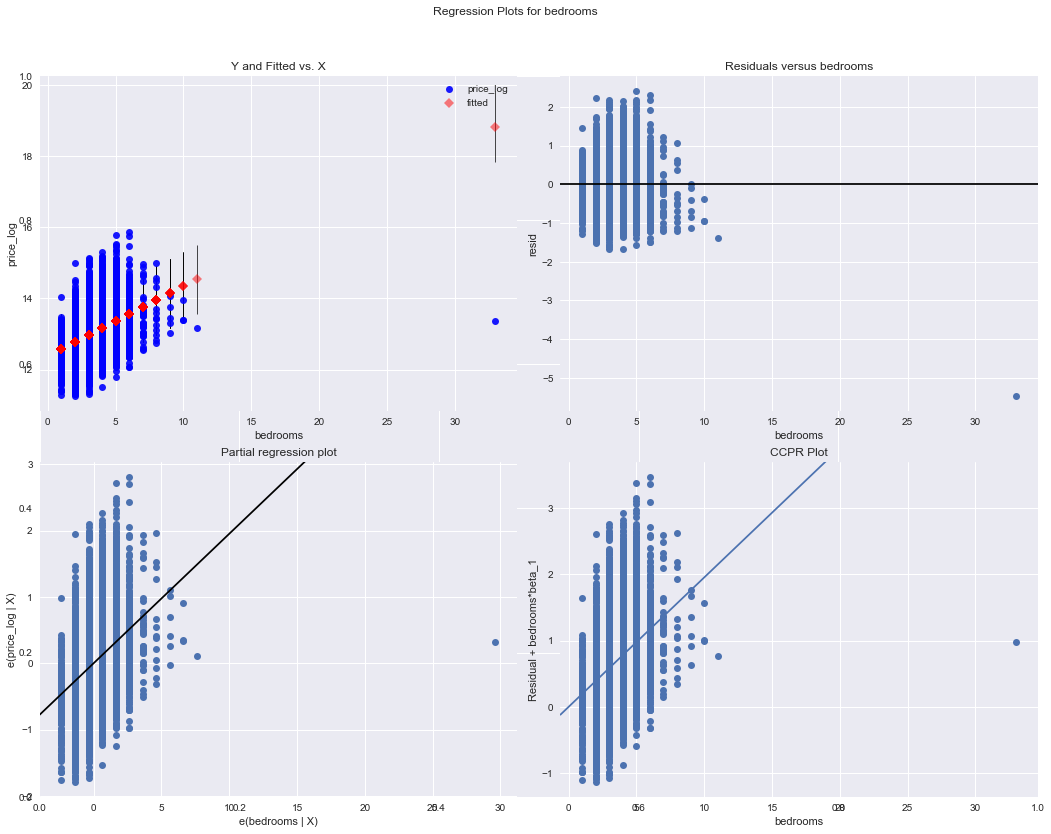

============= bathrooms =============


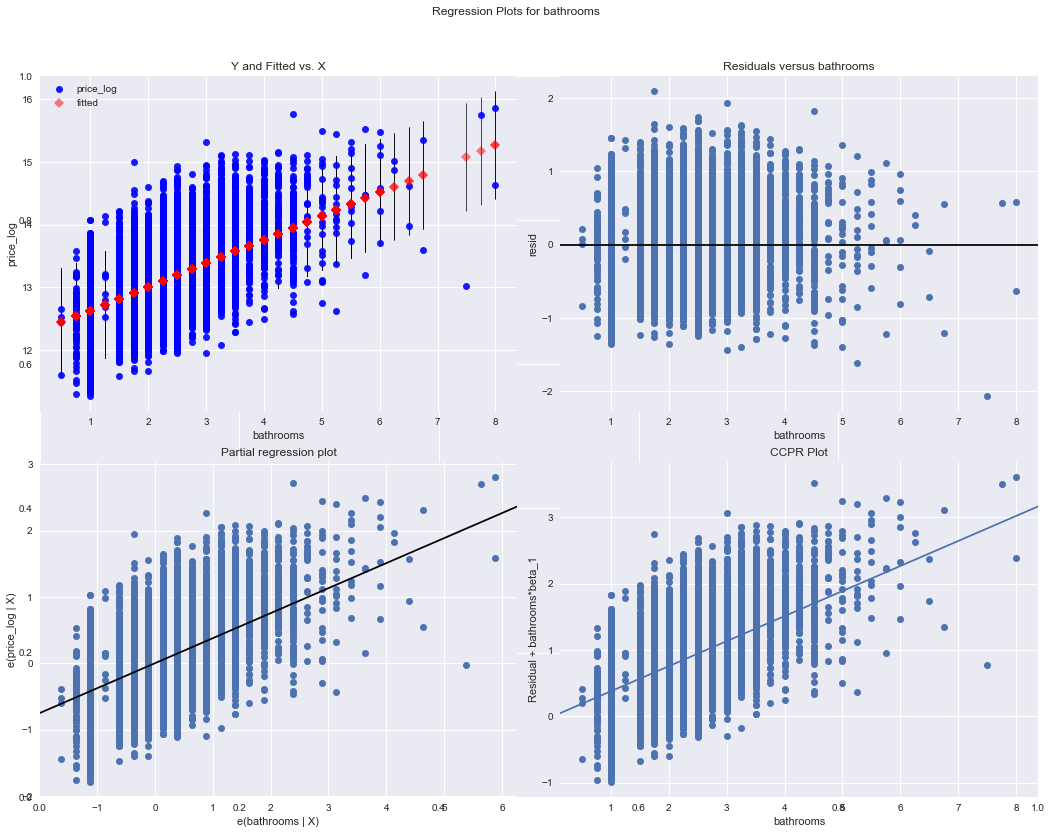

============= sqft_living =============


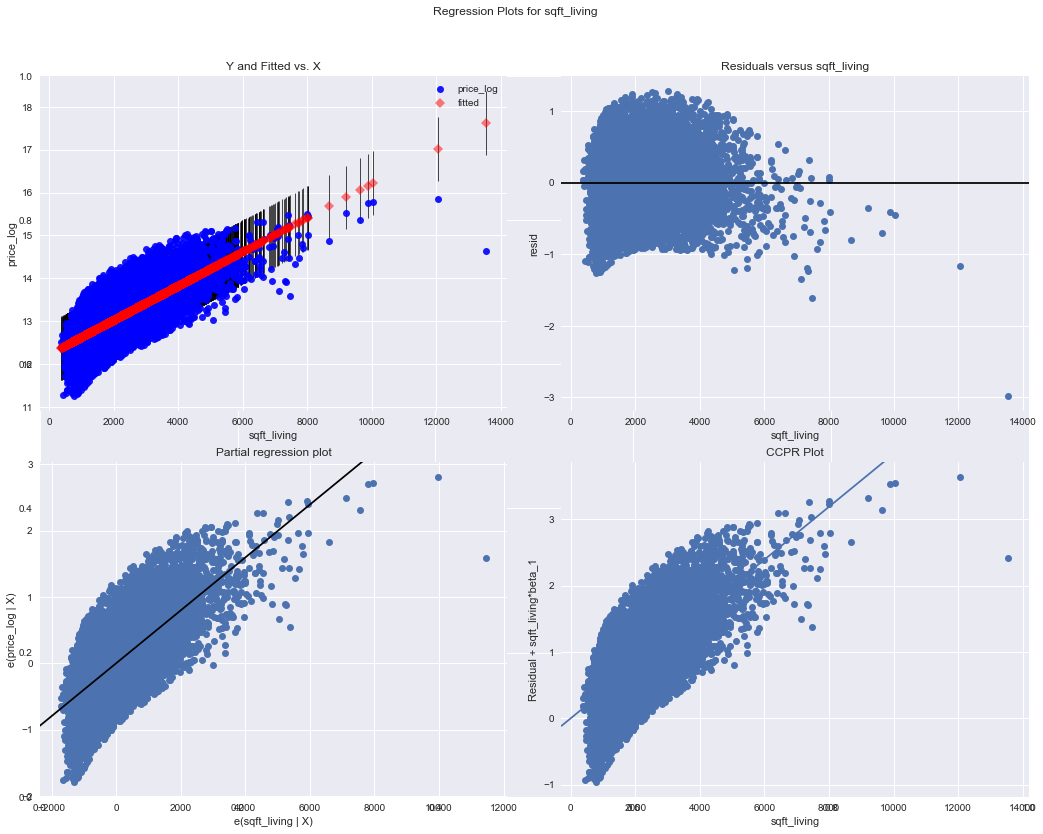

============= sqft_lot =============


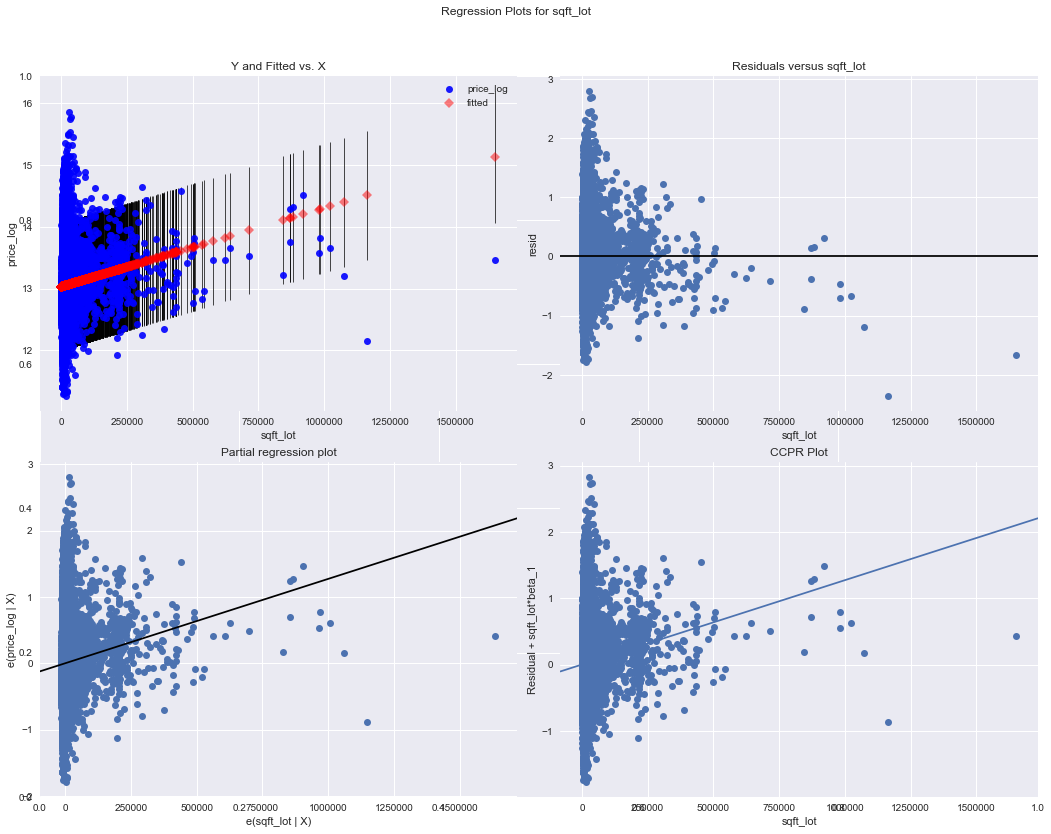

============= floors =============


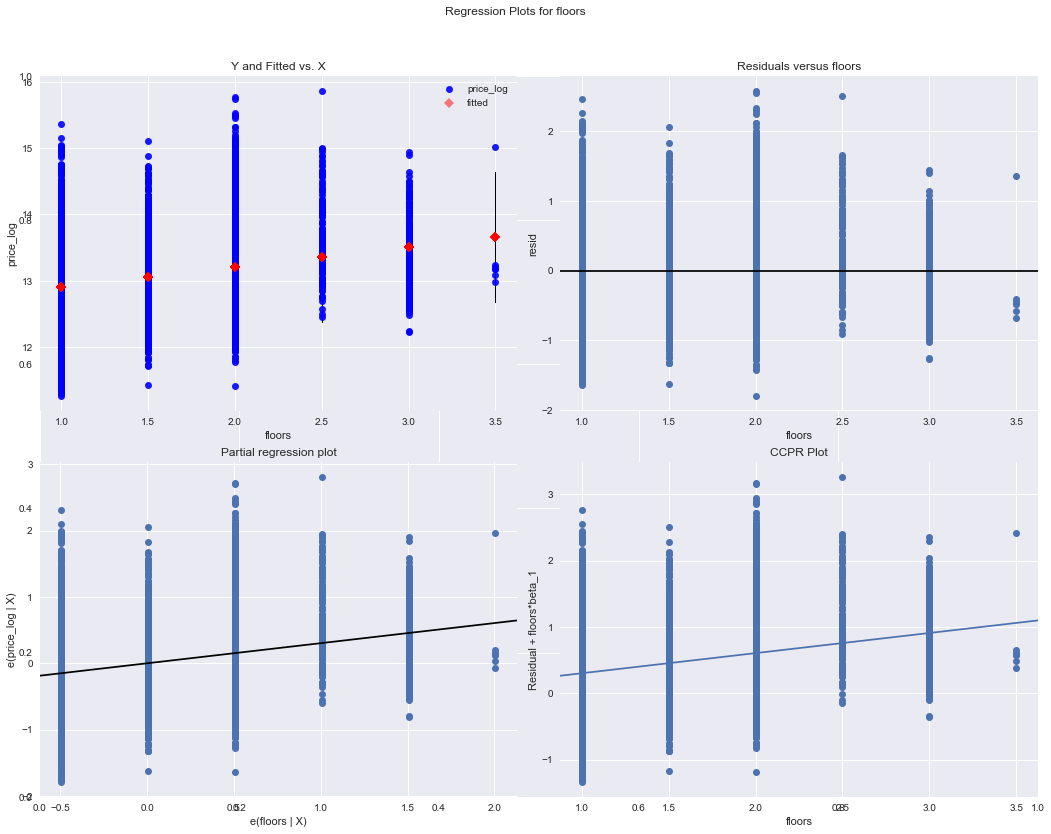

============= condition =============


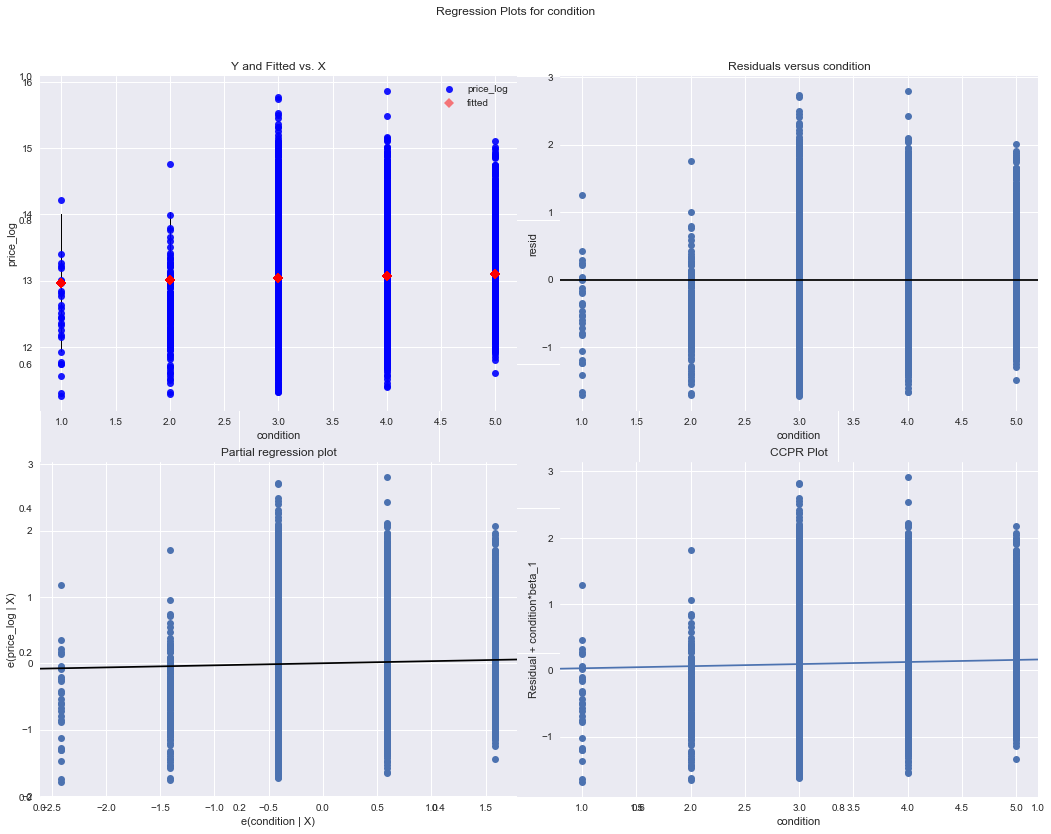

============= grade =============


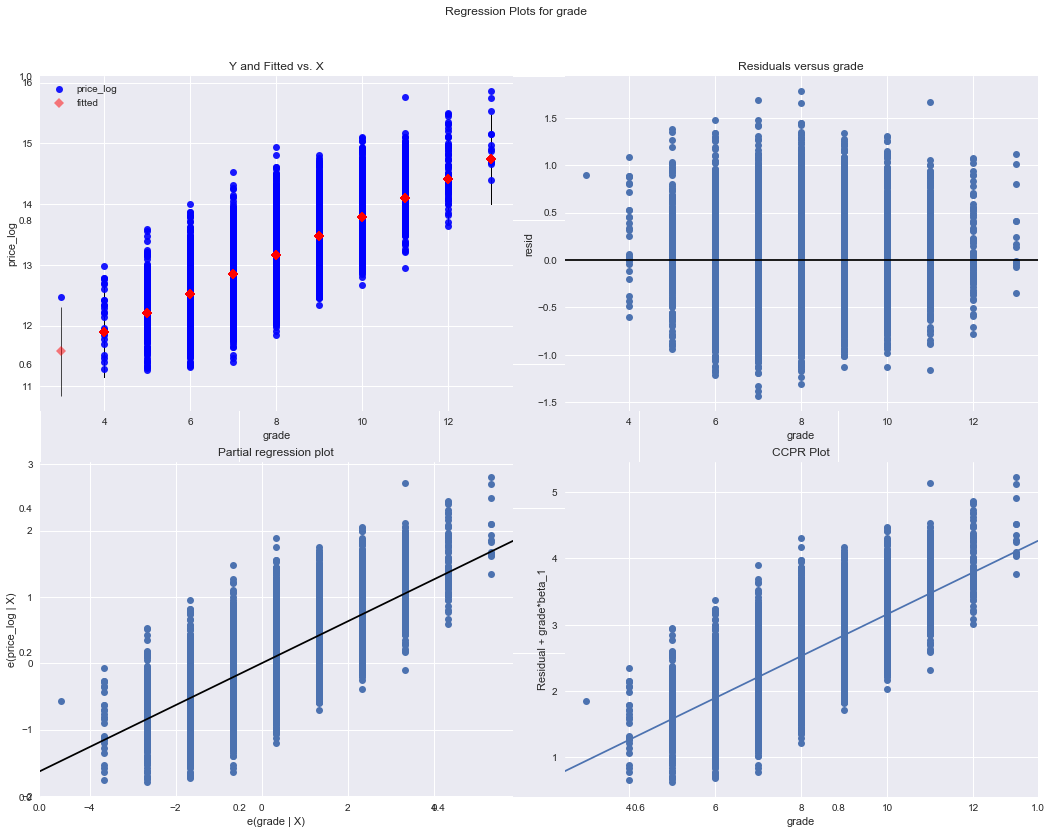

============= sqft_above =============


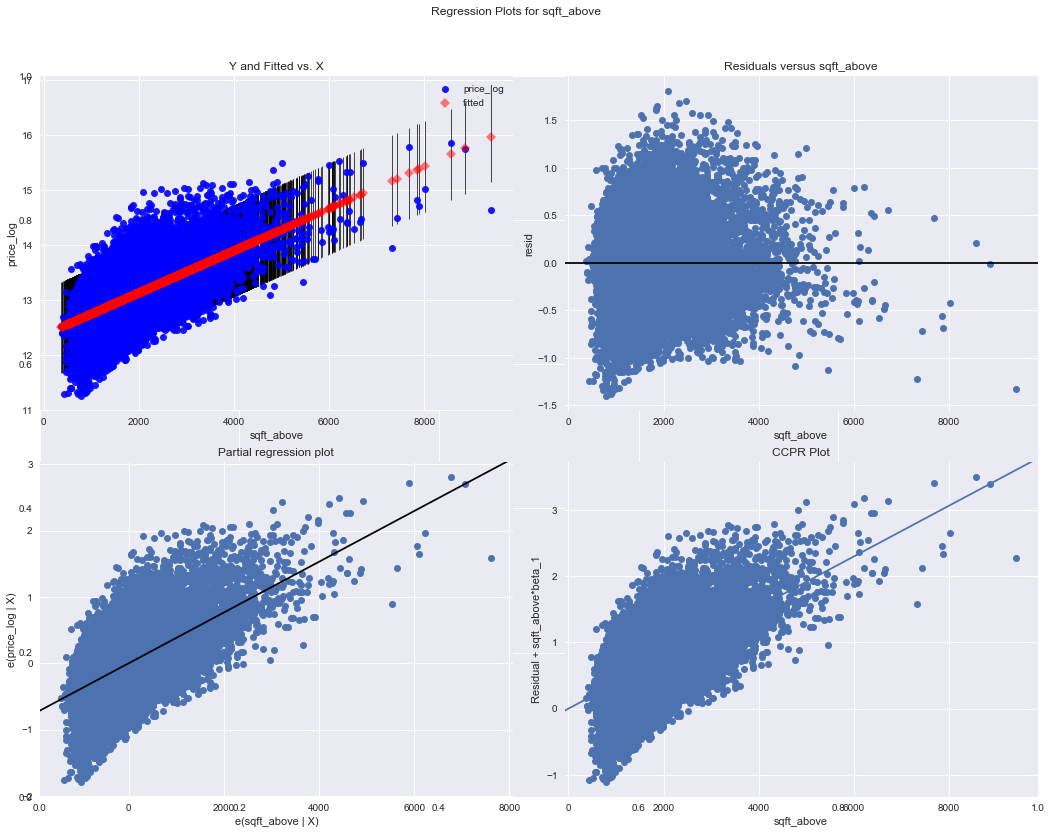

============= yr_built =============


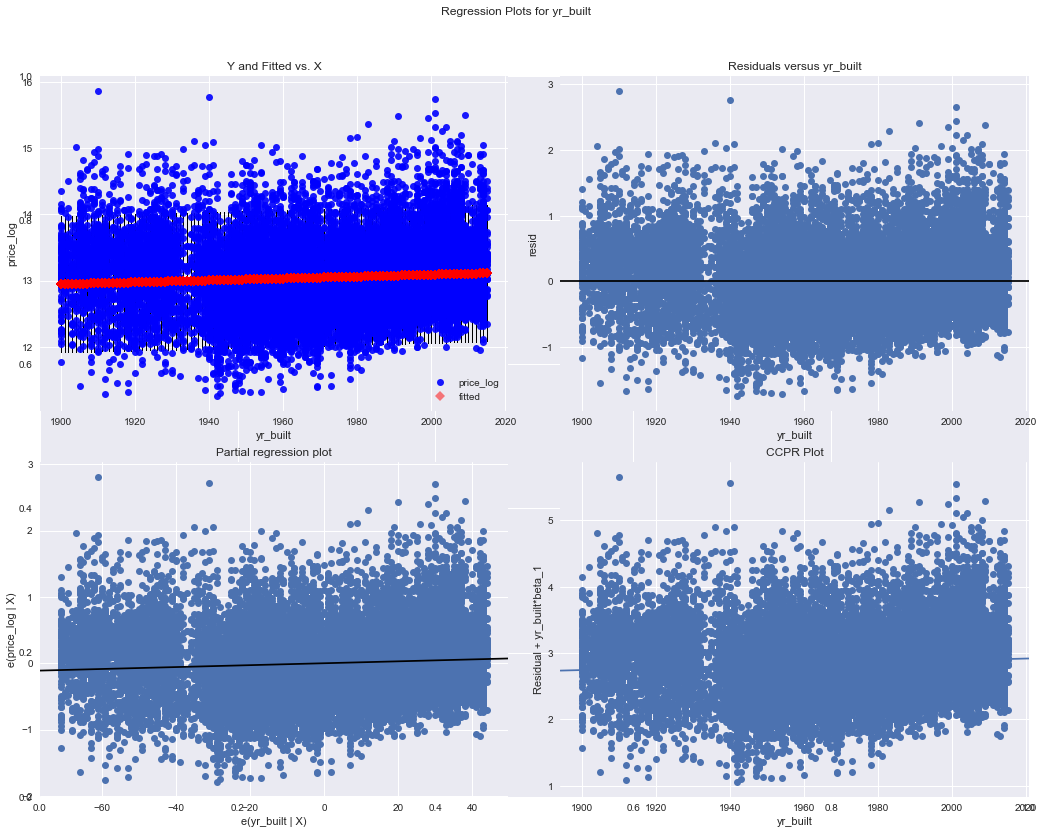

============= zipcode =============


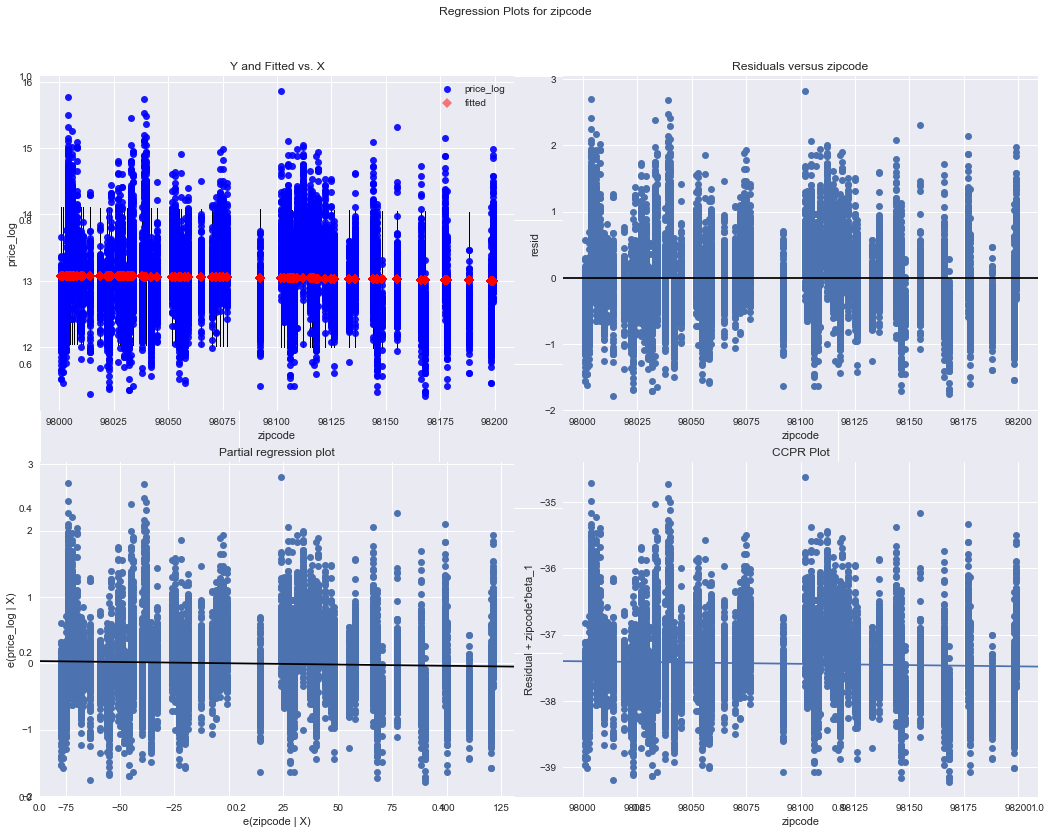

============= lat =============


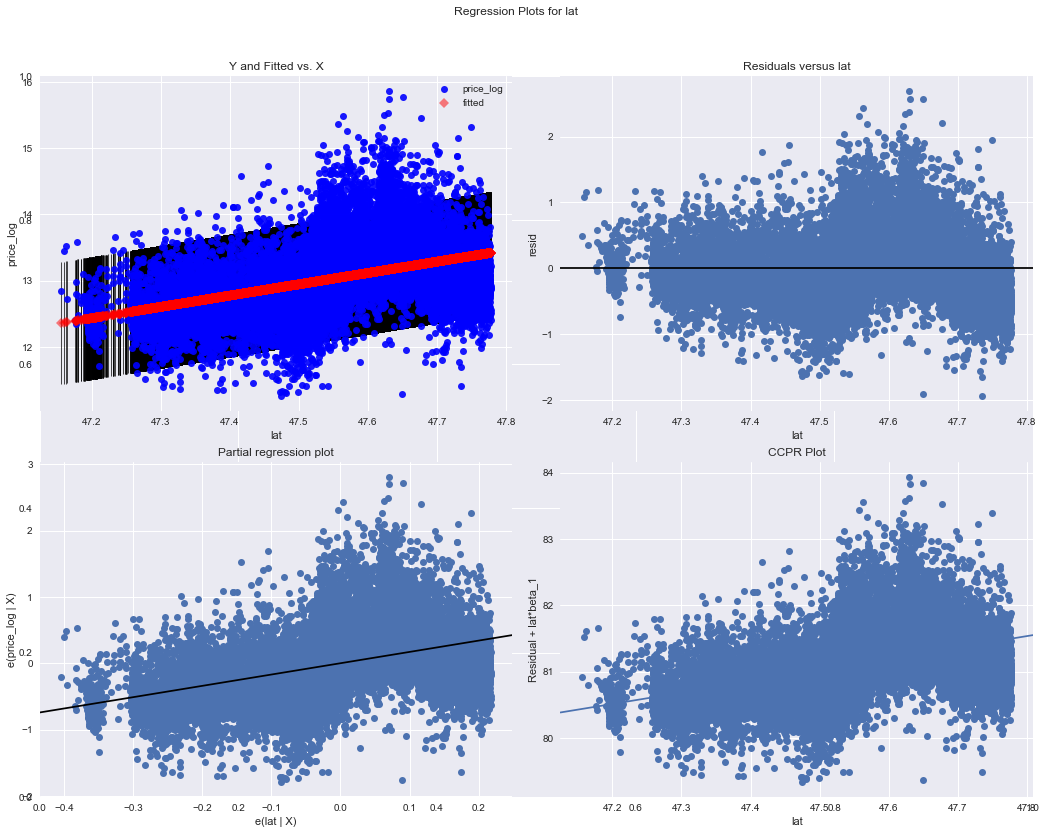

============= long =============


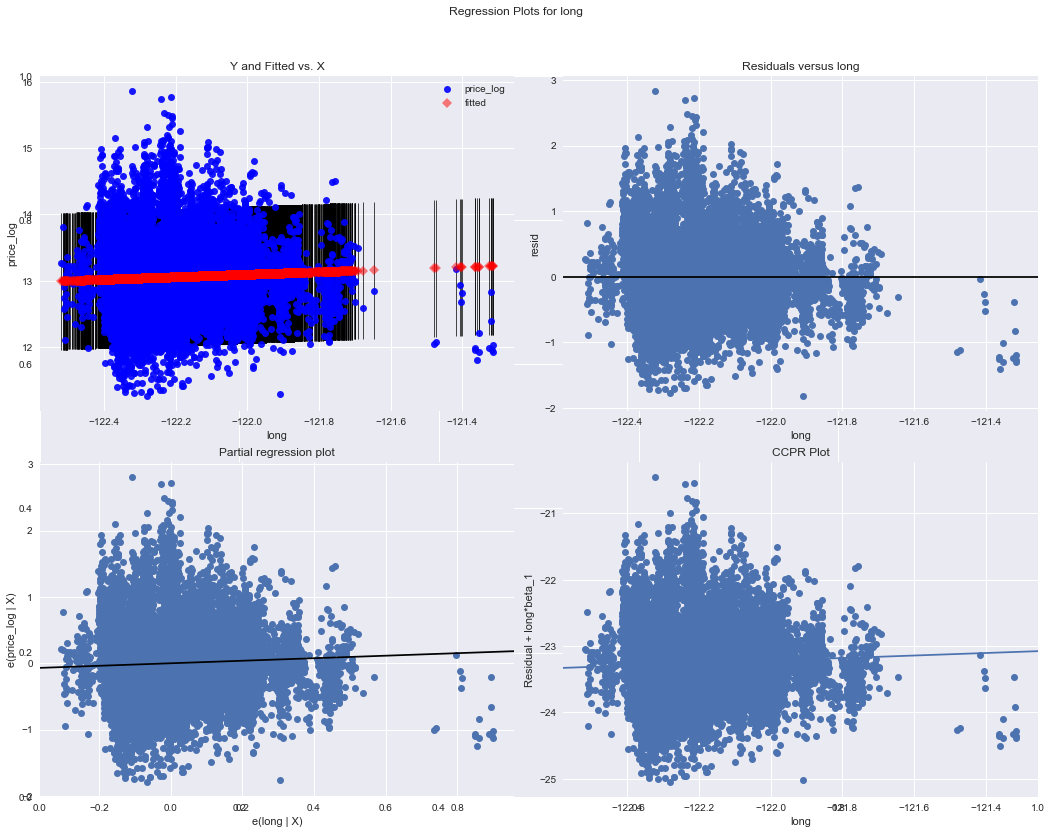

============= sqft_living15 =============


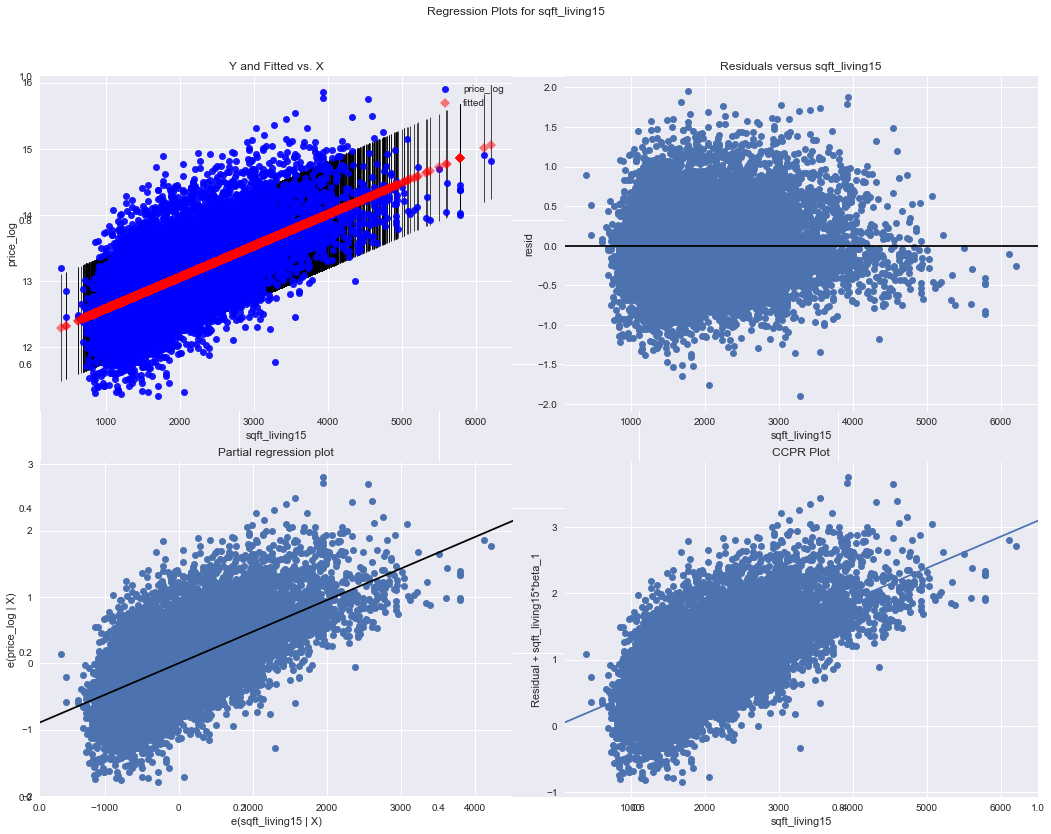

============= sqft_lot15 =============


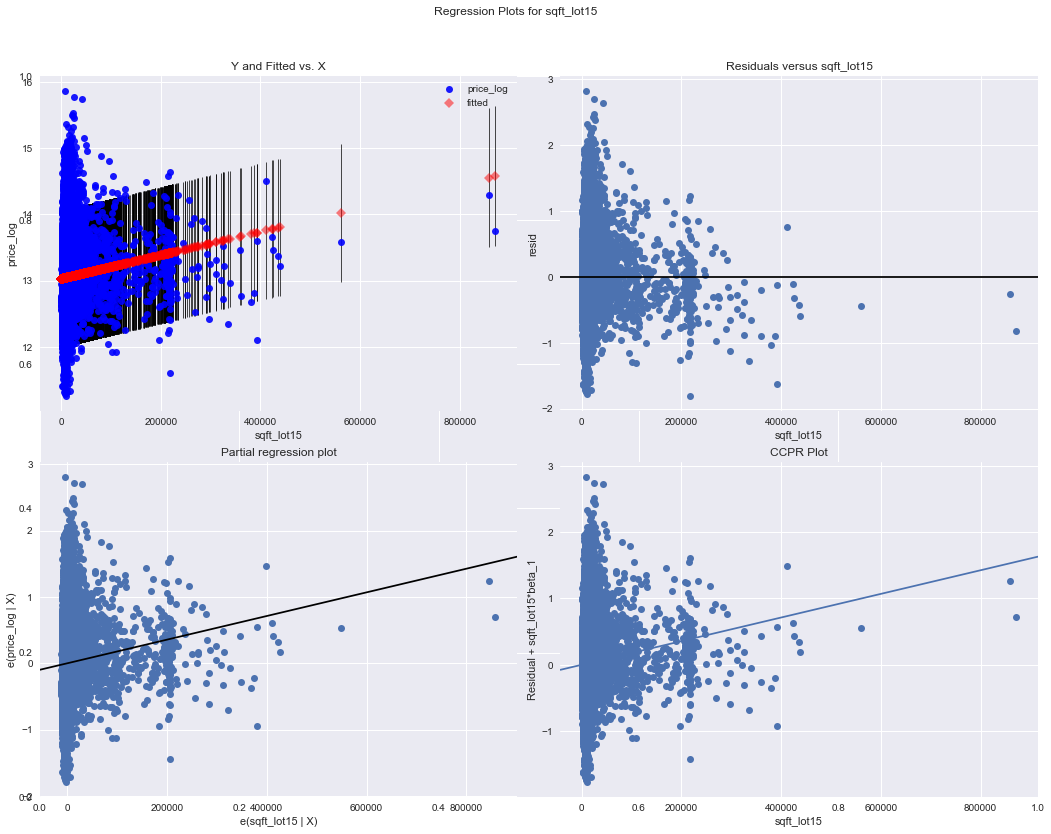

============= day_of_yr_sold =============


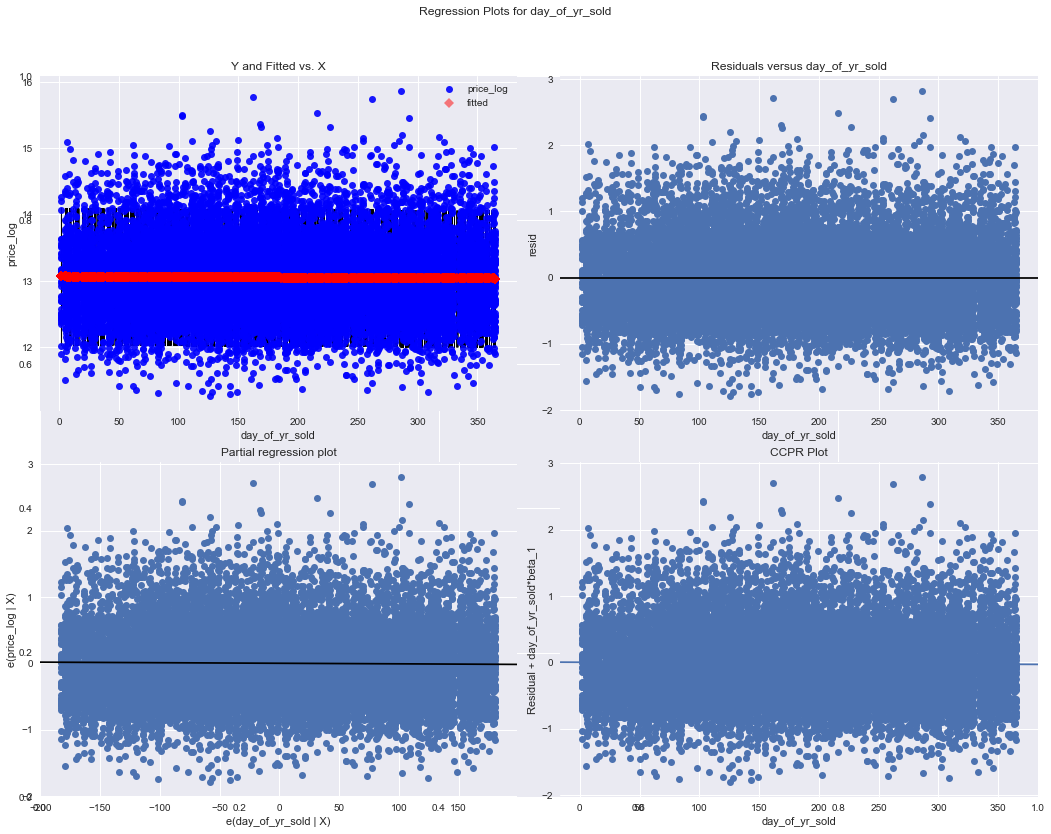

============= sqft_living_log =============


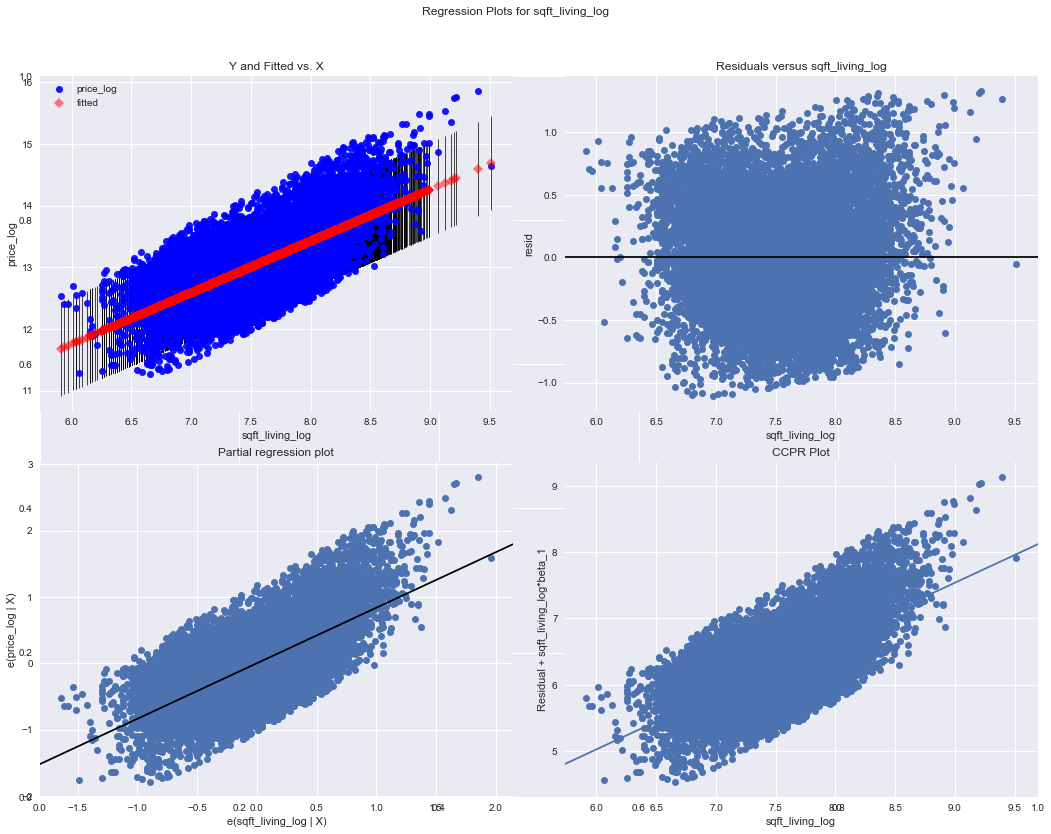

============= sqft_above_log =============


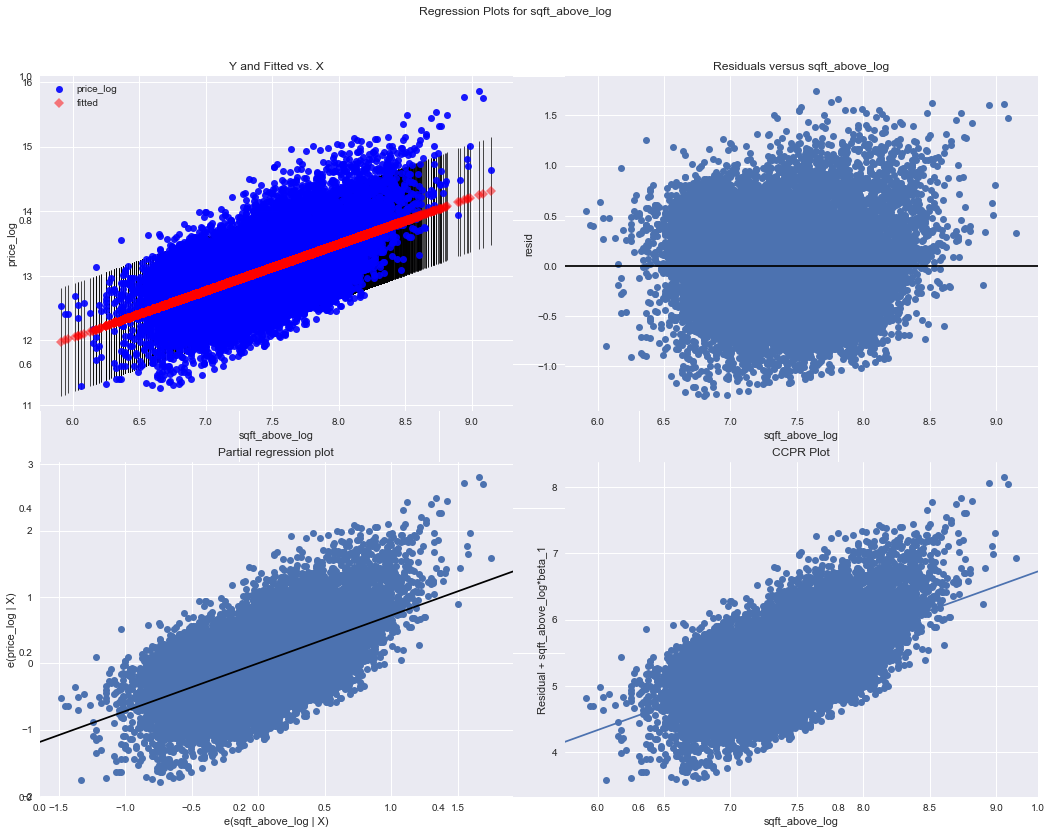

============= sqft_living15_log =============


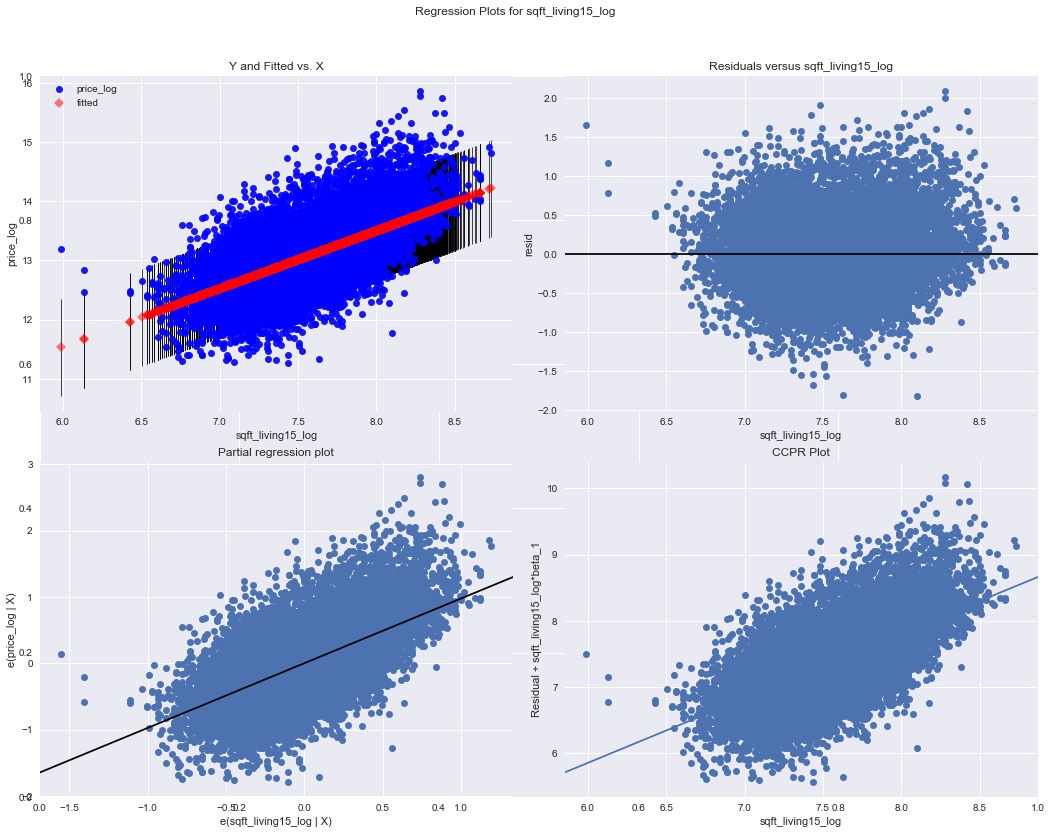

============= waterfront =============


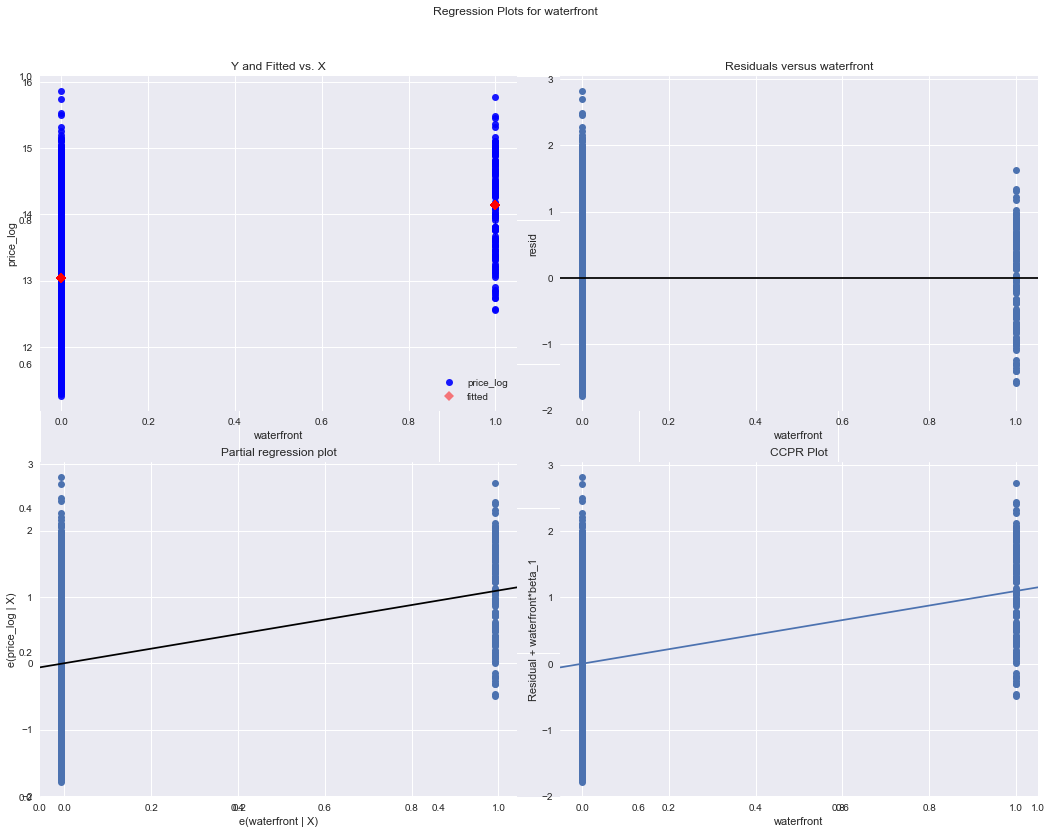

============= view =============


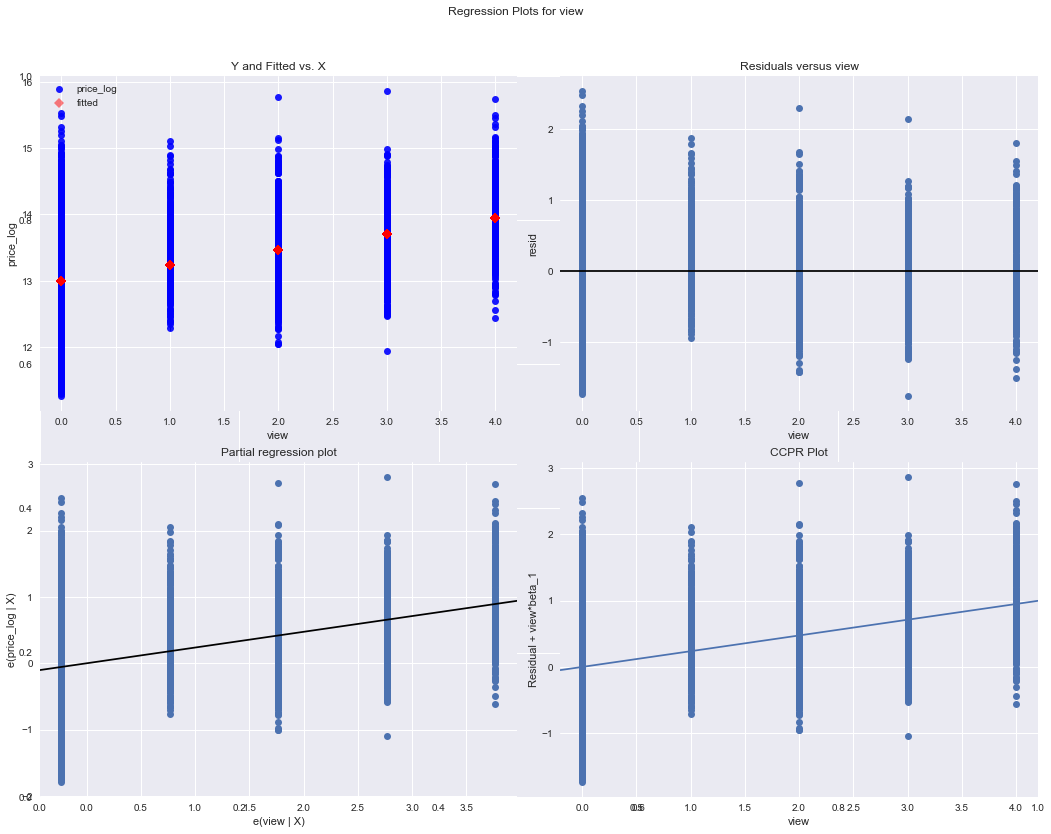

============= sqft_basement =============


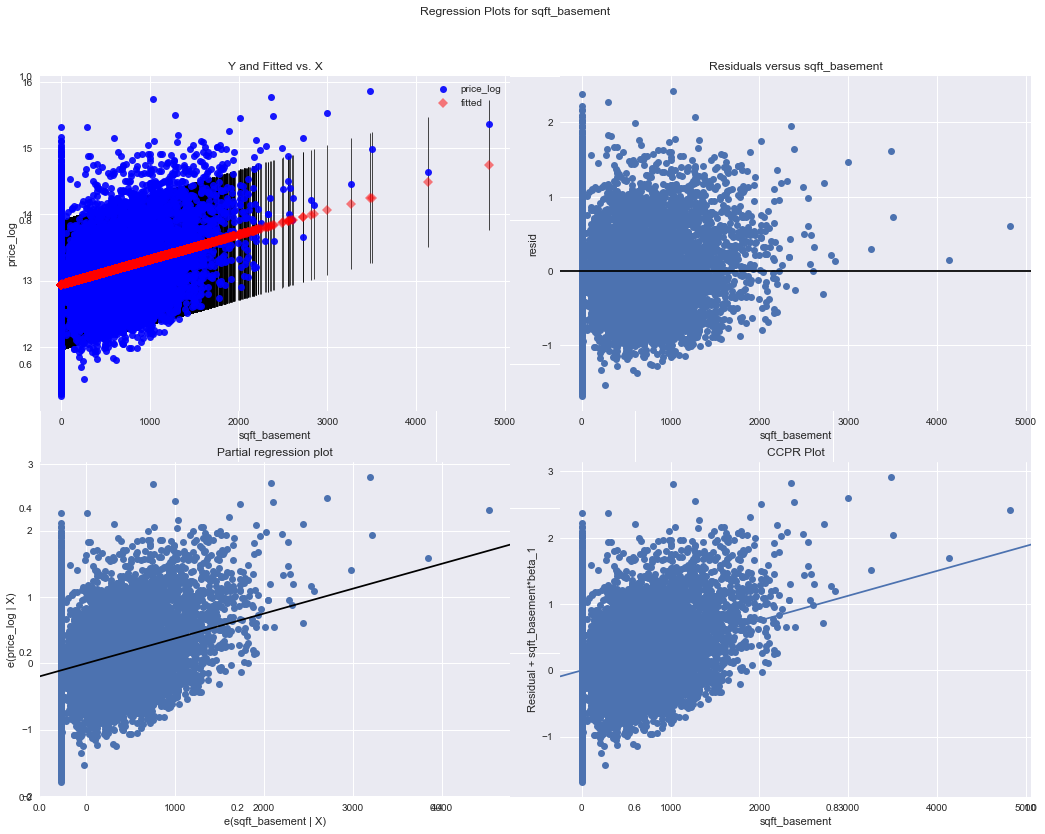

============= yr_renovated =============


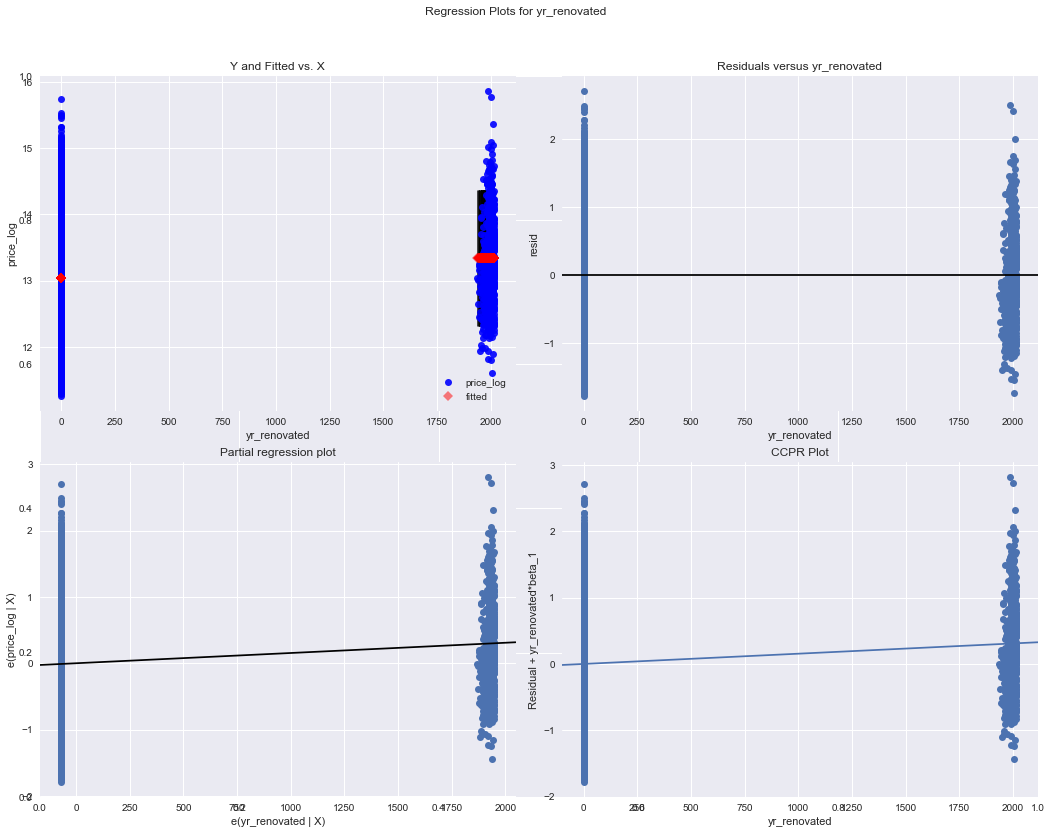

============= waterfront_binary =============


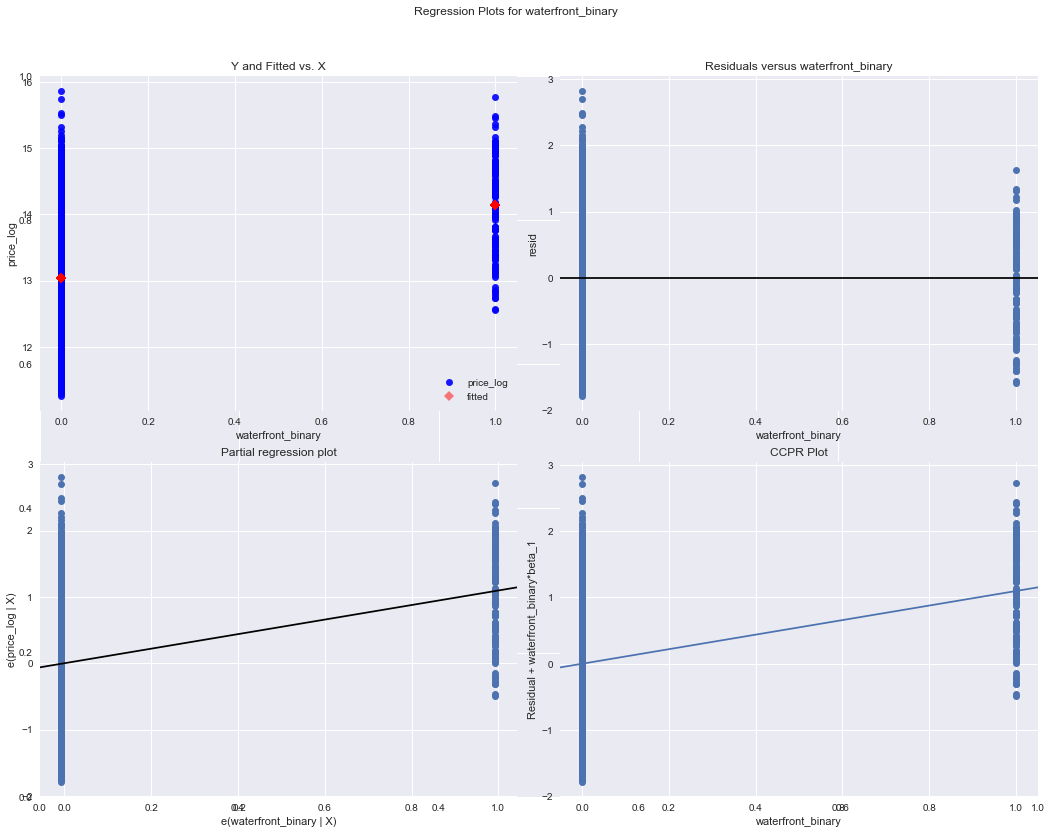

============= view_binary =============


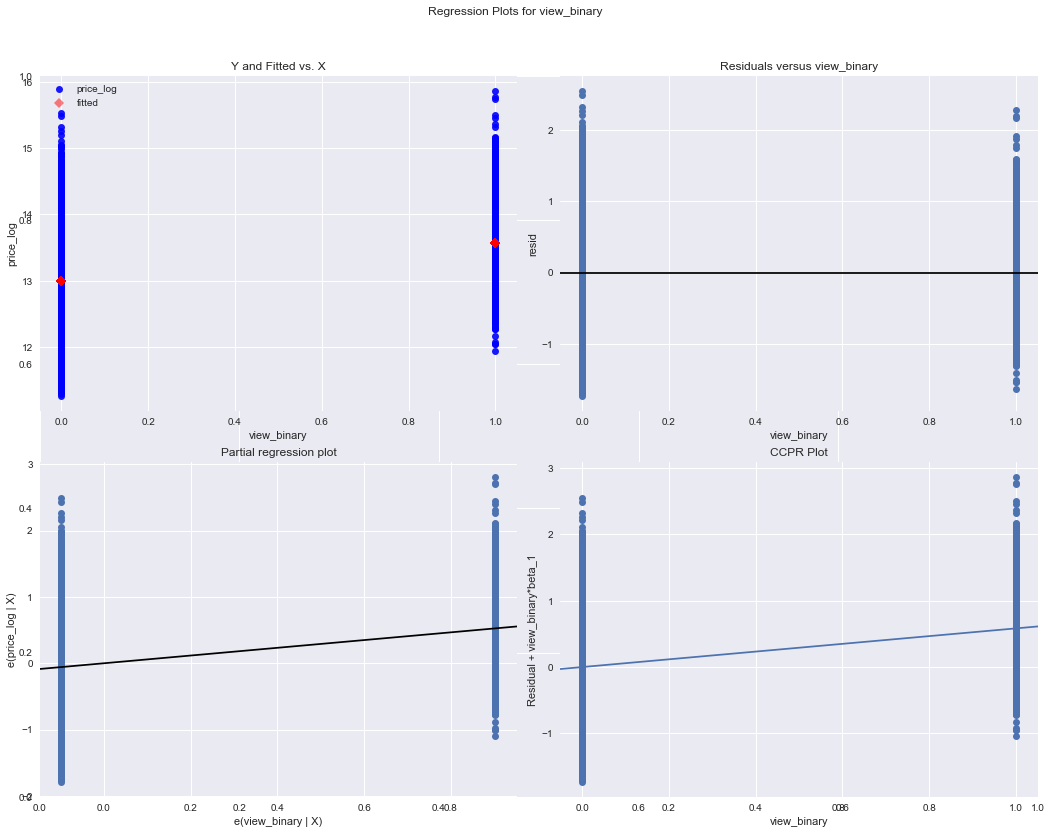

============= sqft_basement_binary =============


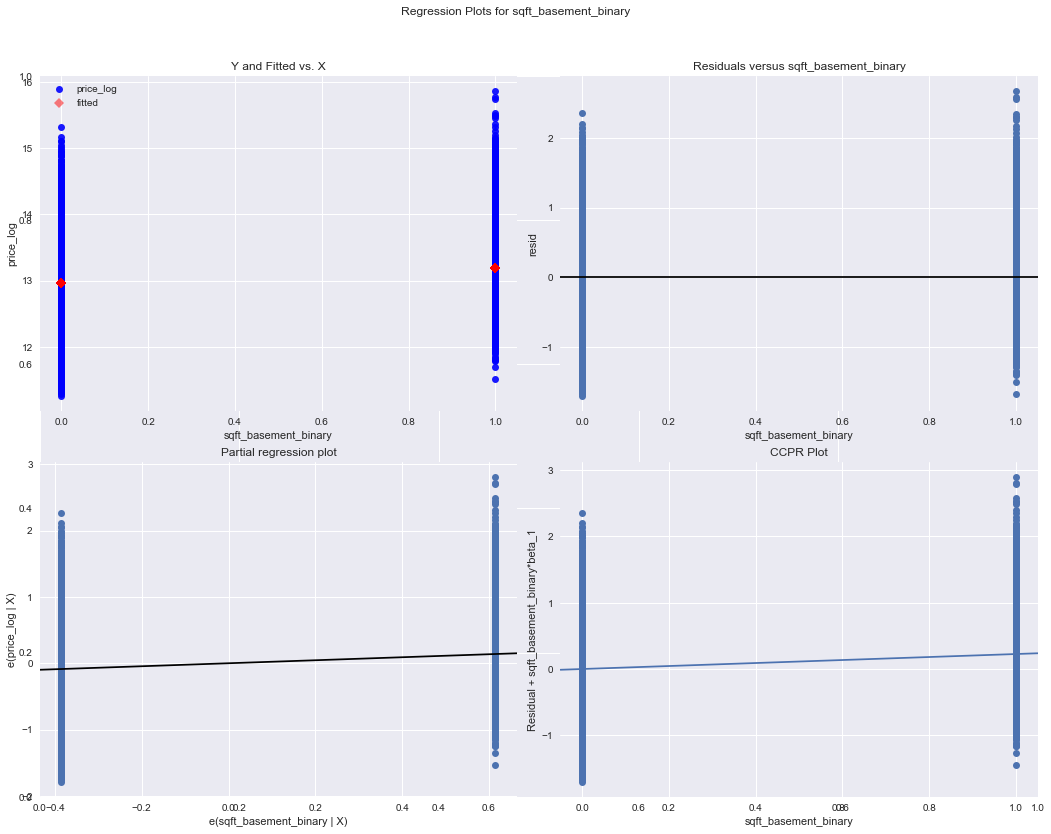

============= yr_renovated_binary =============


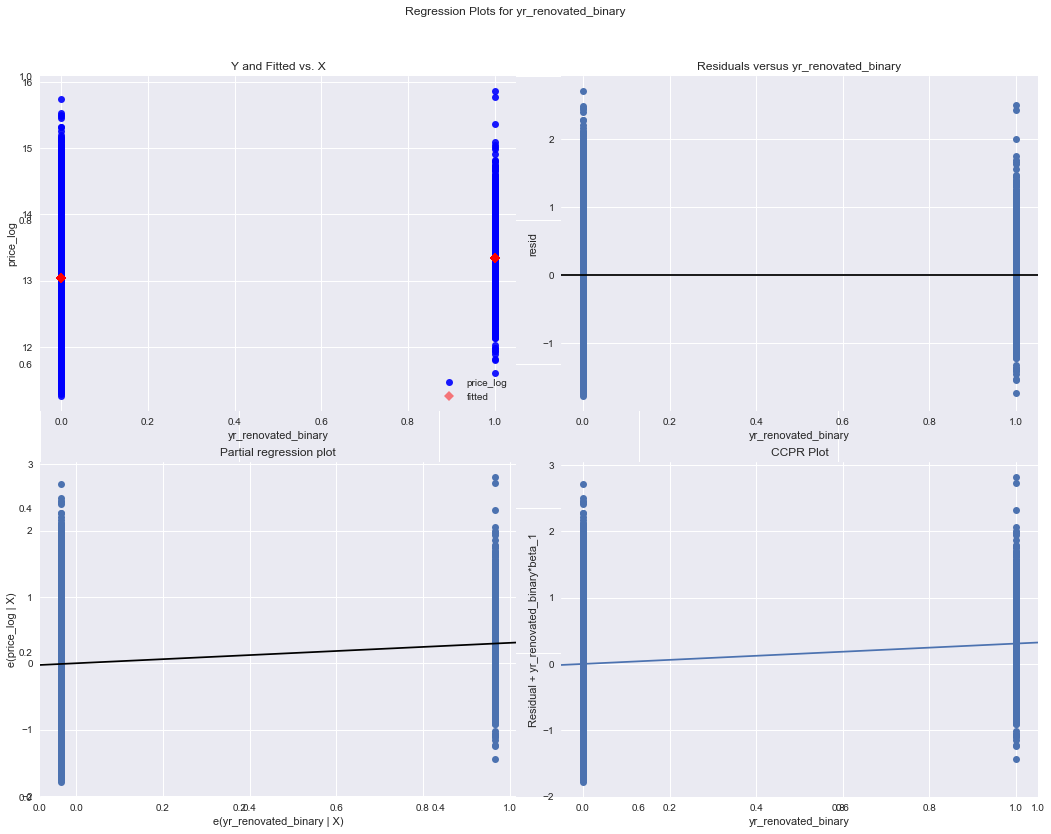

In [173]:
for feature in sig_feats_cols:
    model = models[feature]
    get_exog_plots(model, feature)

clear heteroscedasticity: `sqft_lot_scaled`

mild heteroscedasticity: `grade_scaled`, `lat_scaled`, `waterfront_binary`, `death_rate_scaled`, `hospitalization_rate_scaled`, `positive_rate_scaled`, `population_scaled`, `long_scaled`, `condition_scaled`, and `floors_scaled`.

outlier: `bedrooms_scaled`

# Check for Multicollinearity
Let's check for collinearity between the features we've identified as having a possible relationship with price_log_scaled.

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_yr_sold,sqft_living_log,sqft_above_log,sqft_living15_log,waterfront,view,sqft_basement,yr_renovated,waterfront_binary,view_binary,sqft_basement_binary,yr_renovated_binary
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,0.026496,0.356563,0.479386,0.155670,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.001794,0.621820,0.516072,0.406631,-0.002127,0.078354,0.297229,0.017900,-0.002127,0.079232,0.158412,0.017635
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,-0.126479,0.665838,0.686668,0.507173,-0.204786,0.024280,0.224903,0.569884,0.088303,0.007024,0.762135,0.695839,0.571796,0.063629,0.186016,0.278485,0.047177,0.063629,0.175884,0.159863,0.046742
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,-0.059445,0.762779,0.876448,0.318152,-0.199802,0.052155,0.241214,0.756402,0.184342,0.011368,0.954607,0.843133,0.732180,0.104637,0.281715,0.428660,0.051060,0.104637,0.268465,0.201198,0.050829
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,-0.008830,0.114731,0.184139,0.052946,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.002576,0.150102,0.163623,0.145162,0.021459,0.075054,0.015031,0.004979,0.021459,0.068216,-0.034889,0.005091
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,-0.264075,0.458794,0.523989,0.489193,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.013619,0.367564,0.547619,0.275476,0.020797,0.028414,-0.241866,0.003793,0.020797,0.016311,-0.252465,0.003713
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,1.000000,-0.146896,-0.158904,-0.361592,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.021967,-0.049620,-0.150730,-0.089255,0.016648,0.045622,0.168482,-0.055808,0.016648,0.046835,0.130542,-0.055383
grade,0.356563,0.665838,0.762779,0.114731,0.458794,-0.146896,1.000000,0.756073,0.447865,-0.185771,0.113575,0.200341,0.713867,0.120981,0.007728,0.743038,0.742869,0.689054,0.082818,0.249082,0.165843,0.015623,0.082818,0.235252,0.050701,0.015259
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,-0.158904,0.756073,1.000000,0.424037,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.009862,0.832380,0.962547,0.701745,0.071778,0.166017,-0.051175,0.020645,0.071778,0.151909,-0.207268,0.020566
yr_built,0.155670,0.507173,0.318152,0.052946,0.489193,-0.361592,0.447865,0.424037,1.000000,-0.347210,-0.148370,0.409993,0.326377,0.070777,-0.006773,0.349689,0.451397,0.333819,-0.024487,-0.054452,-0.130085,-0.202555,-0.024487,-0.063826,-0.163992,-0.202837
zipcode,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,0.002888,-0.185771,-0.261570,-0.347210,1.000000,0.266742,-0.564259,-0.279299,-0.147294,-0.000408,-0.222128,-0.290340,-0.290355,0.028923,0.085059,0.073271,0.062397,0.028923,0.091365,0.159599,0.062378


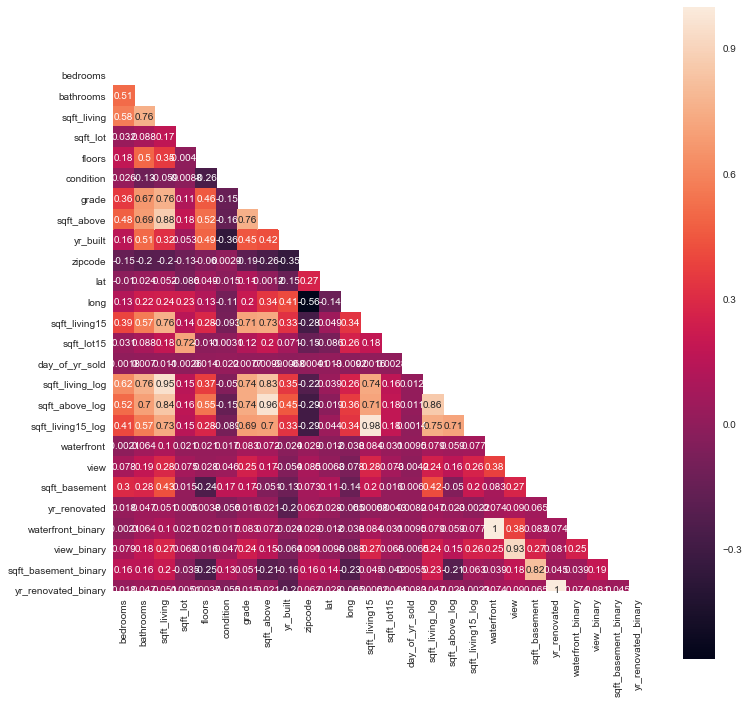

In [174]:
# display correlations
corr = df[sig_feats_cols].corr()
display(corr)
print('\n\n')

# display heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True);

If we set a threshold of correlation of 0.75, then we must one member of each of the following pairs of features:

* (`sqft_living_log_scaled`, `sqft_living15_log_scaled`)
* (`sqft_living_log_scaled`, `sqft_above_log_scaled`)
* (`sqft_living_log_scaled`, `bathrooms_scaled`)

We may want to try both scenarios where we drop either only `sqft_living_log_scaled` or drop the other three.

Now that we've gotten a sense for the various features, let's create some models.